In [1]:
#Imported libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
#Read data
#entry_survey = files.upload()
finding_vuln = files.upload()
finding_vuln_data = pd.read_excel('finding_vulnerabilities_experiment.xlsx')

Saving finding_vulnerabilities_experiment.xlsx to finding_vulnerabilities_experiment.xlsx


In [3]:
finding_vuln = files.upload()
finding_vuln_training = pd.read_excel('finding_vulnerabilities_training.xlsx')

Saving finding_vulnerabilities_training.xlsx to finding_vulnerabilities_training.xlsx


In [4]:
####### vulnerable lines #######

#path traversal
path_slice = [76, 78, 79, 80, 81, 83, 95, 108, 113, 114, 119, 120, 123]
path_full = [368,383,384,385,386,388, 432, 846, 853, 854, 859, 860, 864]

#injection
user_slice = [59, 61, 62, 87, 90]
user_full = [144, 147, 151, 287, 290]

#xss
xss_slice = [73, 74, 75, 76]
xss_full = [441, 444, 450, 451]

#dos
dos_slice = [48,50,51]
dos_full = [459, 462, 463]

In [5]:
path_full_neighborhood3 = []
path_slice_neighborhood3 = []

user_full_neighborhood3 = []
user_slice_neighborhood3 = []

xss_full_neighborhood3 = []
xss_slice_neighborhood3 = []

dos_full_neighborhood3 = []
dos_slice_neighborhood3 = []

path_full_neighborhood6 = []
path_slice_neighborhood6 = []

user_full_neighborhood6 = []
user_slice_neighborhood6 = []

xss_full_neighborhood6 = []
xss_slice_neighborhood6 = []

dos_full_neighborhood6 = []
dos_slice_neighborhood6 = []

path_full_neighborhood9 = []
path_slice_neighborhood9 = []

user_full_neighborhood9 = []
user_slice_neighborhood9 = []

xss_full_neighborhood9 = []
xss_slice_neighborhood9 = []

dos_full_neighborhood9 = []
dos_slice_neighborhood9 = []

In [6]:
def create_neighborhood_array(vuln_neighborhood0, neighborhood_rate):
  new_vuln_neighborhood = []
  for vuln in vuln_neighborhood0:
    for n in range(vuln-(neighborhood_rate-1), vuln+neighborhood_rate):
      if n not in new_vuln_neighborhood:
        new_vuln_neighborhood.append(n)

  return new_vuln_neighborhood


for delta in range(3, 10, 3):
  if delta == 3:
    path_slice_neighborhood3 = create_neighborhood_array(path_slice, delta)
    path_full_neighborhood3 = create_neighborhood_array(path_full, delta)

    user_slice_neighborhood3 = create_neighborhood_array(user_slice, delta)
    user_full_neighborhood3 = create_neighborhood_array(user_full, delta)

    xss_slice_neighborhood3 = create_neighborhood_array(xss_slice, delta)
    xss_full_neighborhood3 = create_neighborhood_array(xss_full, delta)

    dos_slice_neighborhood3 = create_neighborhood_array(dos_slice, delta)
    dos_full_neighborhood3 = create_neighborhood_array(dos_full, delta)

  if delta == 6:
    path_slice_neighborhood6 = create_neighborhood_array(path_slice, delta)
    path_full_neighborhood6 = create_neighborhood_array(path_full, delta)

    user_slice_neighborhood6 = create_neighborhood_array(user_slice, delta)
    user_full_neighborhood6 = create_neighborhood_array(user_full, delta)

    xss_slice_neighborhood6 = create_neighborhood_array(xss_slice, delta)
    xss_full_neighborhood6 = create_neighborhood_array(xss_full, delta)

    dos_slice_neighborhood6 = create_neighborhood_array(dos_slice, delta)
    dos_full_neighborhood6 = create_neighborhood_array(dos_full, delta)

  if delta == 9:
    path_slice_neighborhood9 = create_neighborhood_array(path_slice, delta)
    path_full_neighborhood9 = create_neighborhood_array(path_full, delta)

    user_slice_neighborhood9 = create_neighborhood_array(user_slice, delta)
    user_full_neighborhood9 = create_neighborhood_array(user_full, delta)

    xss_slice_neighborhood9 = create_neighborhood_array(xss_slice, delta)
    xss_full_neighborhood9 = create_neighborhood_array(xss_full, delta)

    dos_slice_neighborhood9 = create_neighborhood_array(dos_slice, delta)
    dos_full_neighborhood9 = create_neighborhood_array(dos_full, delta)

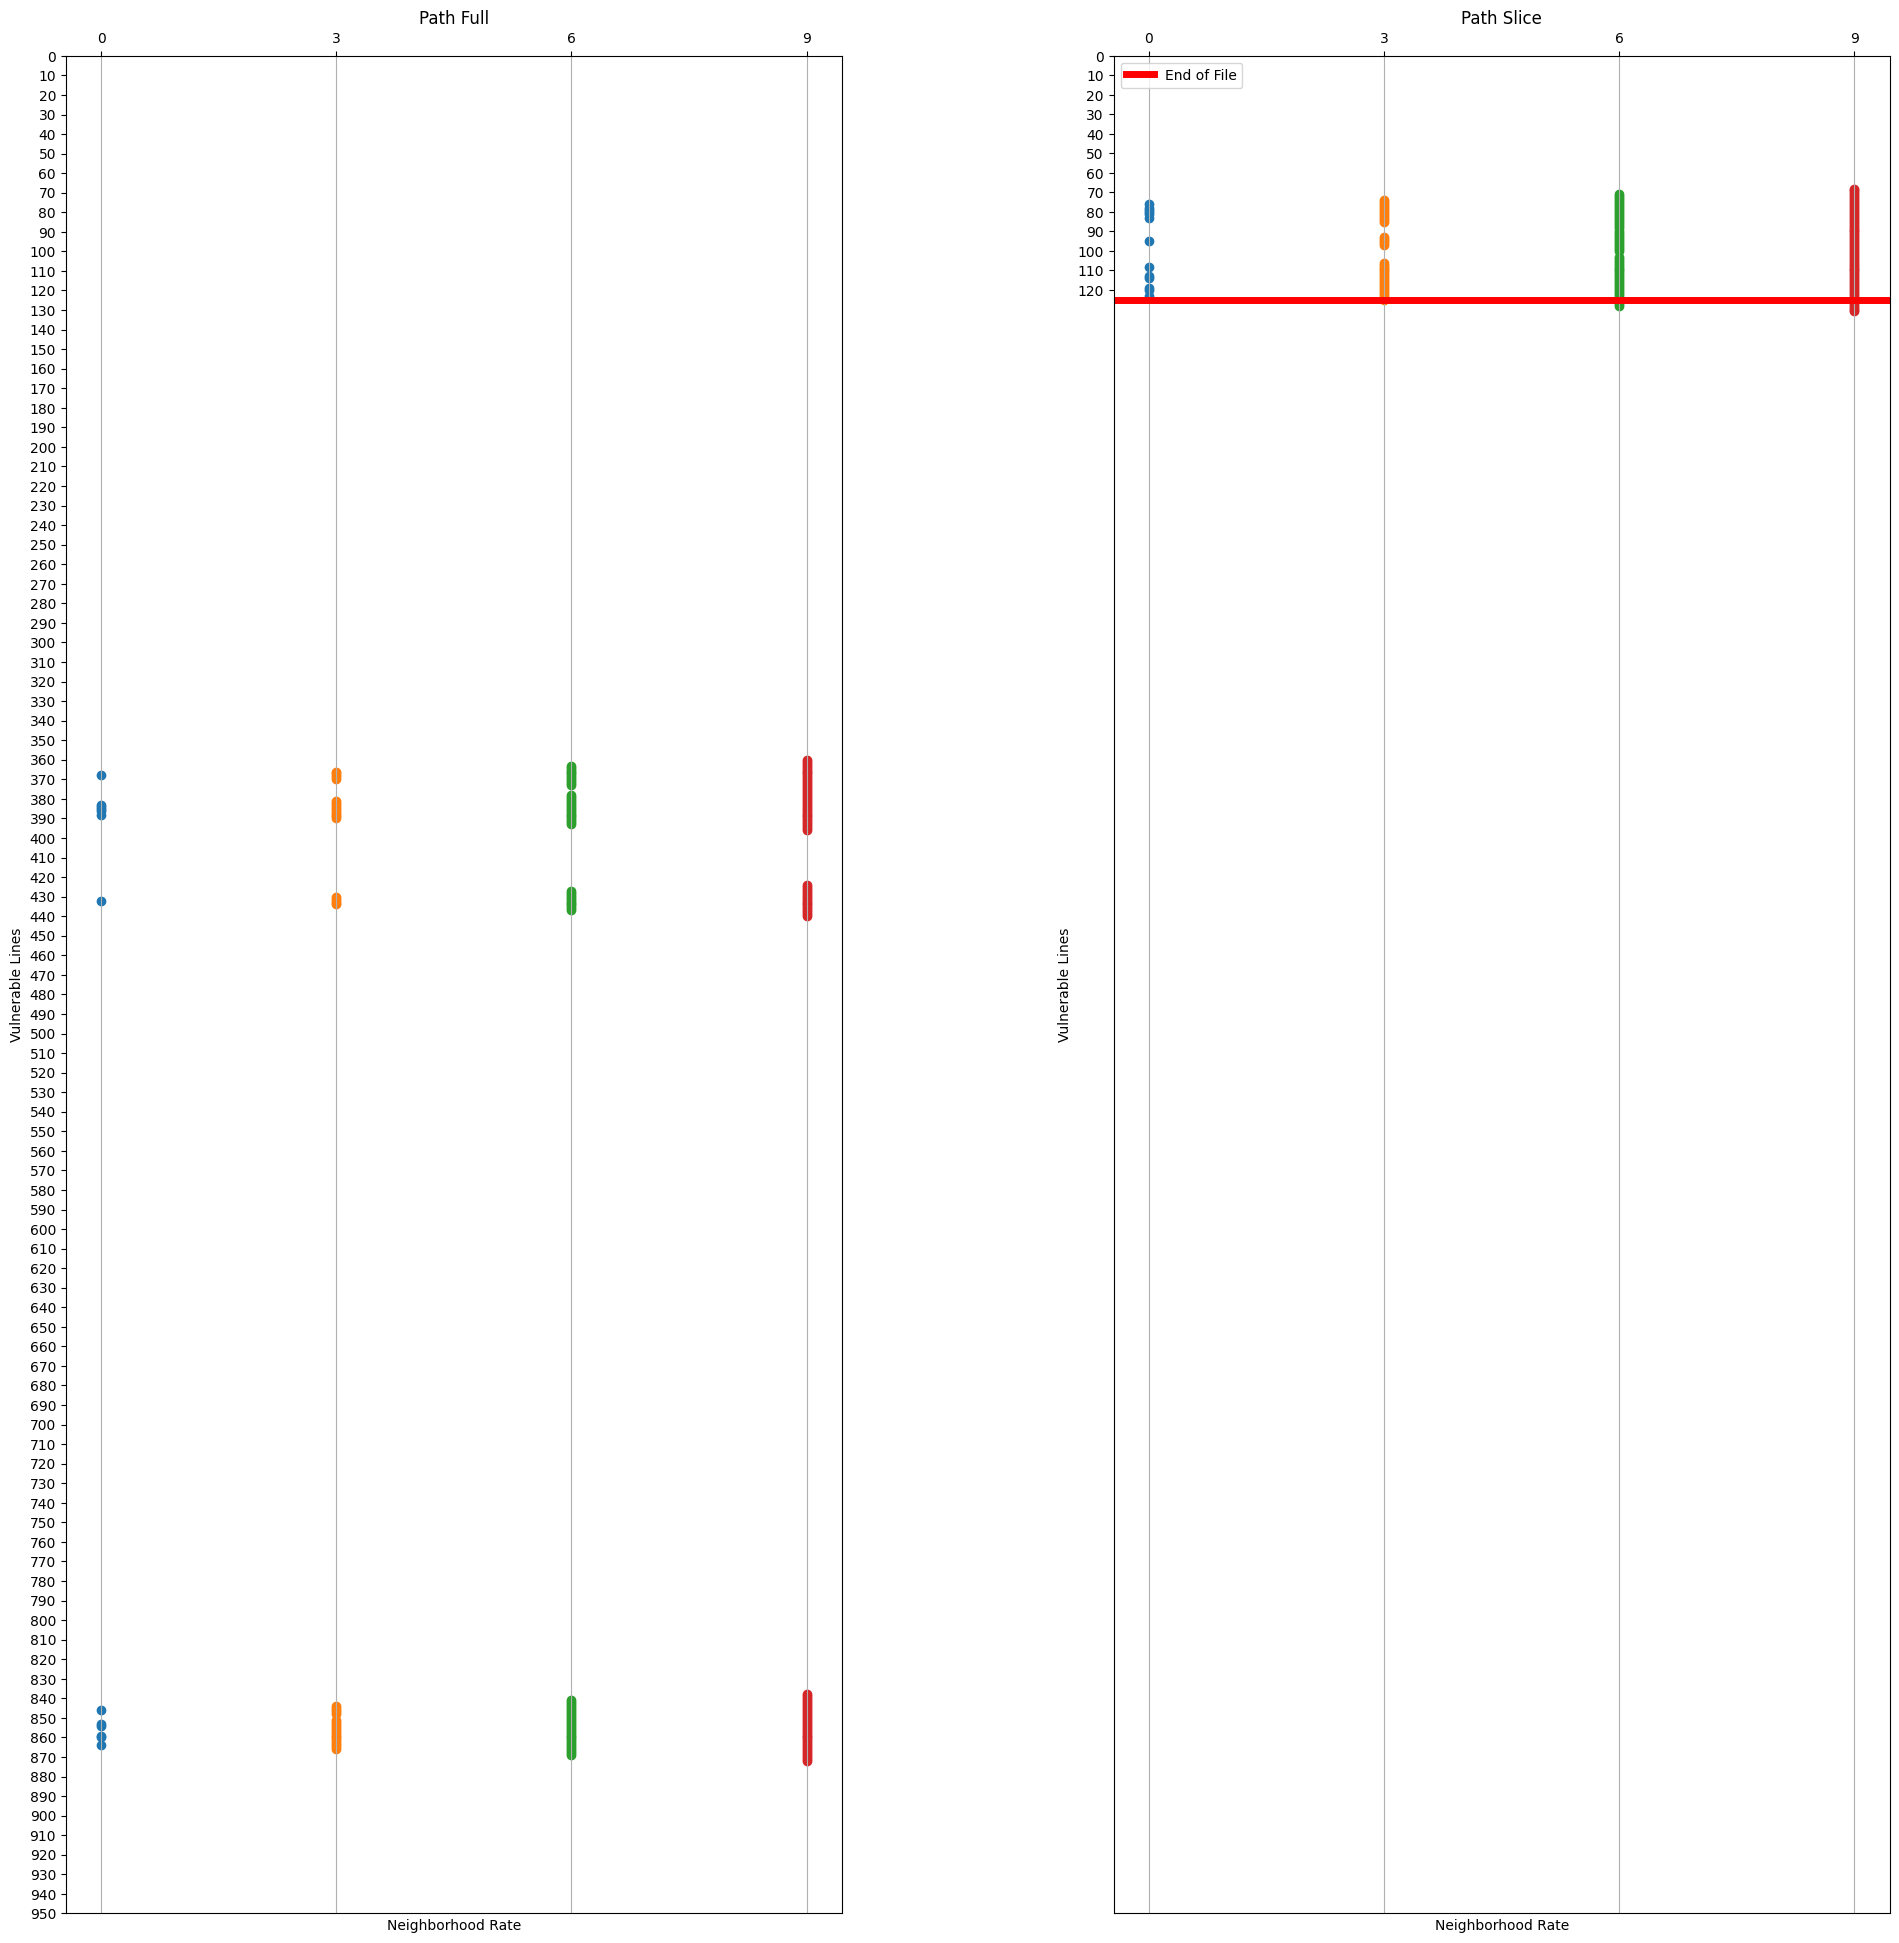

In [7]:
# FIGURE 1 SHOWING VULNERABLE LINES OF PATH
dict_path_slice = {0: path_slice, 3: path_slice_neighborhood3, 6: path_slice_neighborhood6, 9: path_slice_neighborhood9}
dict_path_full = {0: path_full, 3: path_full_neighborhood3, 6: path_full_neighborhood6, 9: path_full_neighborhood9}

plt.subplot(1, 2, 1)
for xe, ye in dict_path_full.items():
  plt.scatter([xe] * len(ye), ye)
plt.title("Path Full")
plt.xlabel('Neighborhood Rate')
plt.ylabel('Vulnerable Lines')
plt.grid(axis='x')
plt.xticks(range(0, 10, 3))
#plt.yticks(path_full_neighborhood9)
plt.yticks(range(0,952,10))
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()

plt.subplot(1, 2, 2)
for xe, ye in dict_path_slice.items():
  plt.scatter([xe] * len(ye), ye)
plt.title("Path Slice")
plt.xlabel('Neighborhood Rate')
plt.ylabel('Vulnerable Lines')
plt.grid(axis='x')
plt.xticks(range(0, 10, 3))
#plt.yticks(path_slice_neighborhood9)
plt.yticks(range(0,125,10))
plt.ylim(0,952)
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()
plt.axhline(y=125, linewidth=5, label= 'End of File', color='red')
plt.legend(loc = 'upper left')
plt.subplots_adjust(top=5.95, bottom=2.08, left=2.10, right=4.95, hspace=0.25,
                    wspace=0.35)
plt.show()

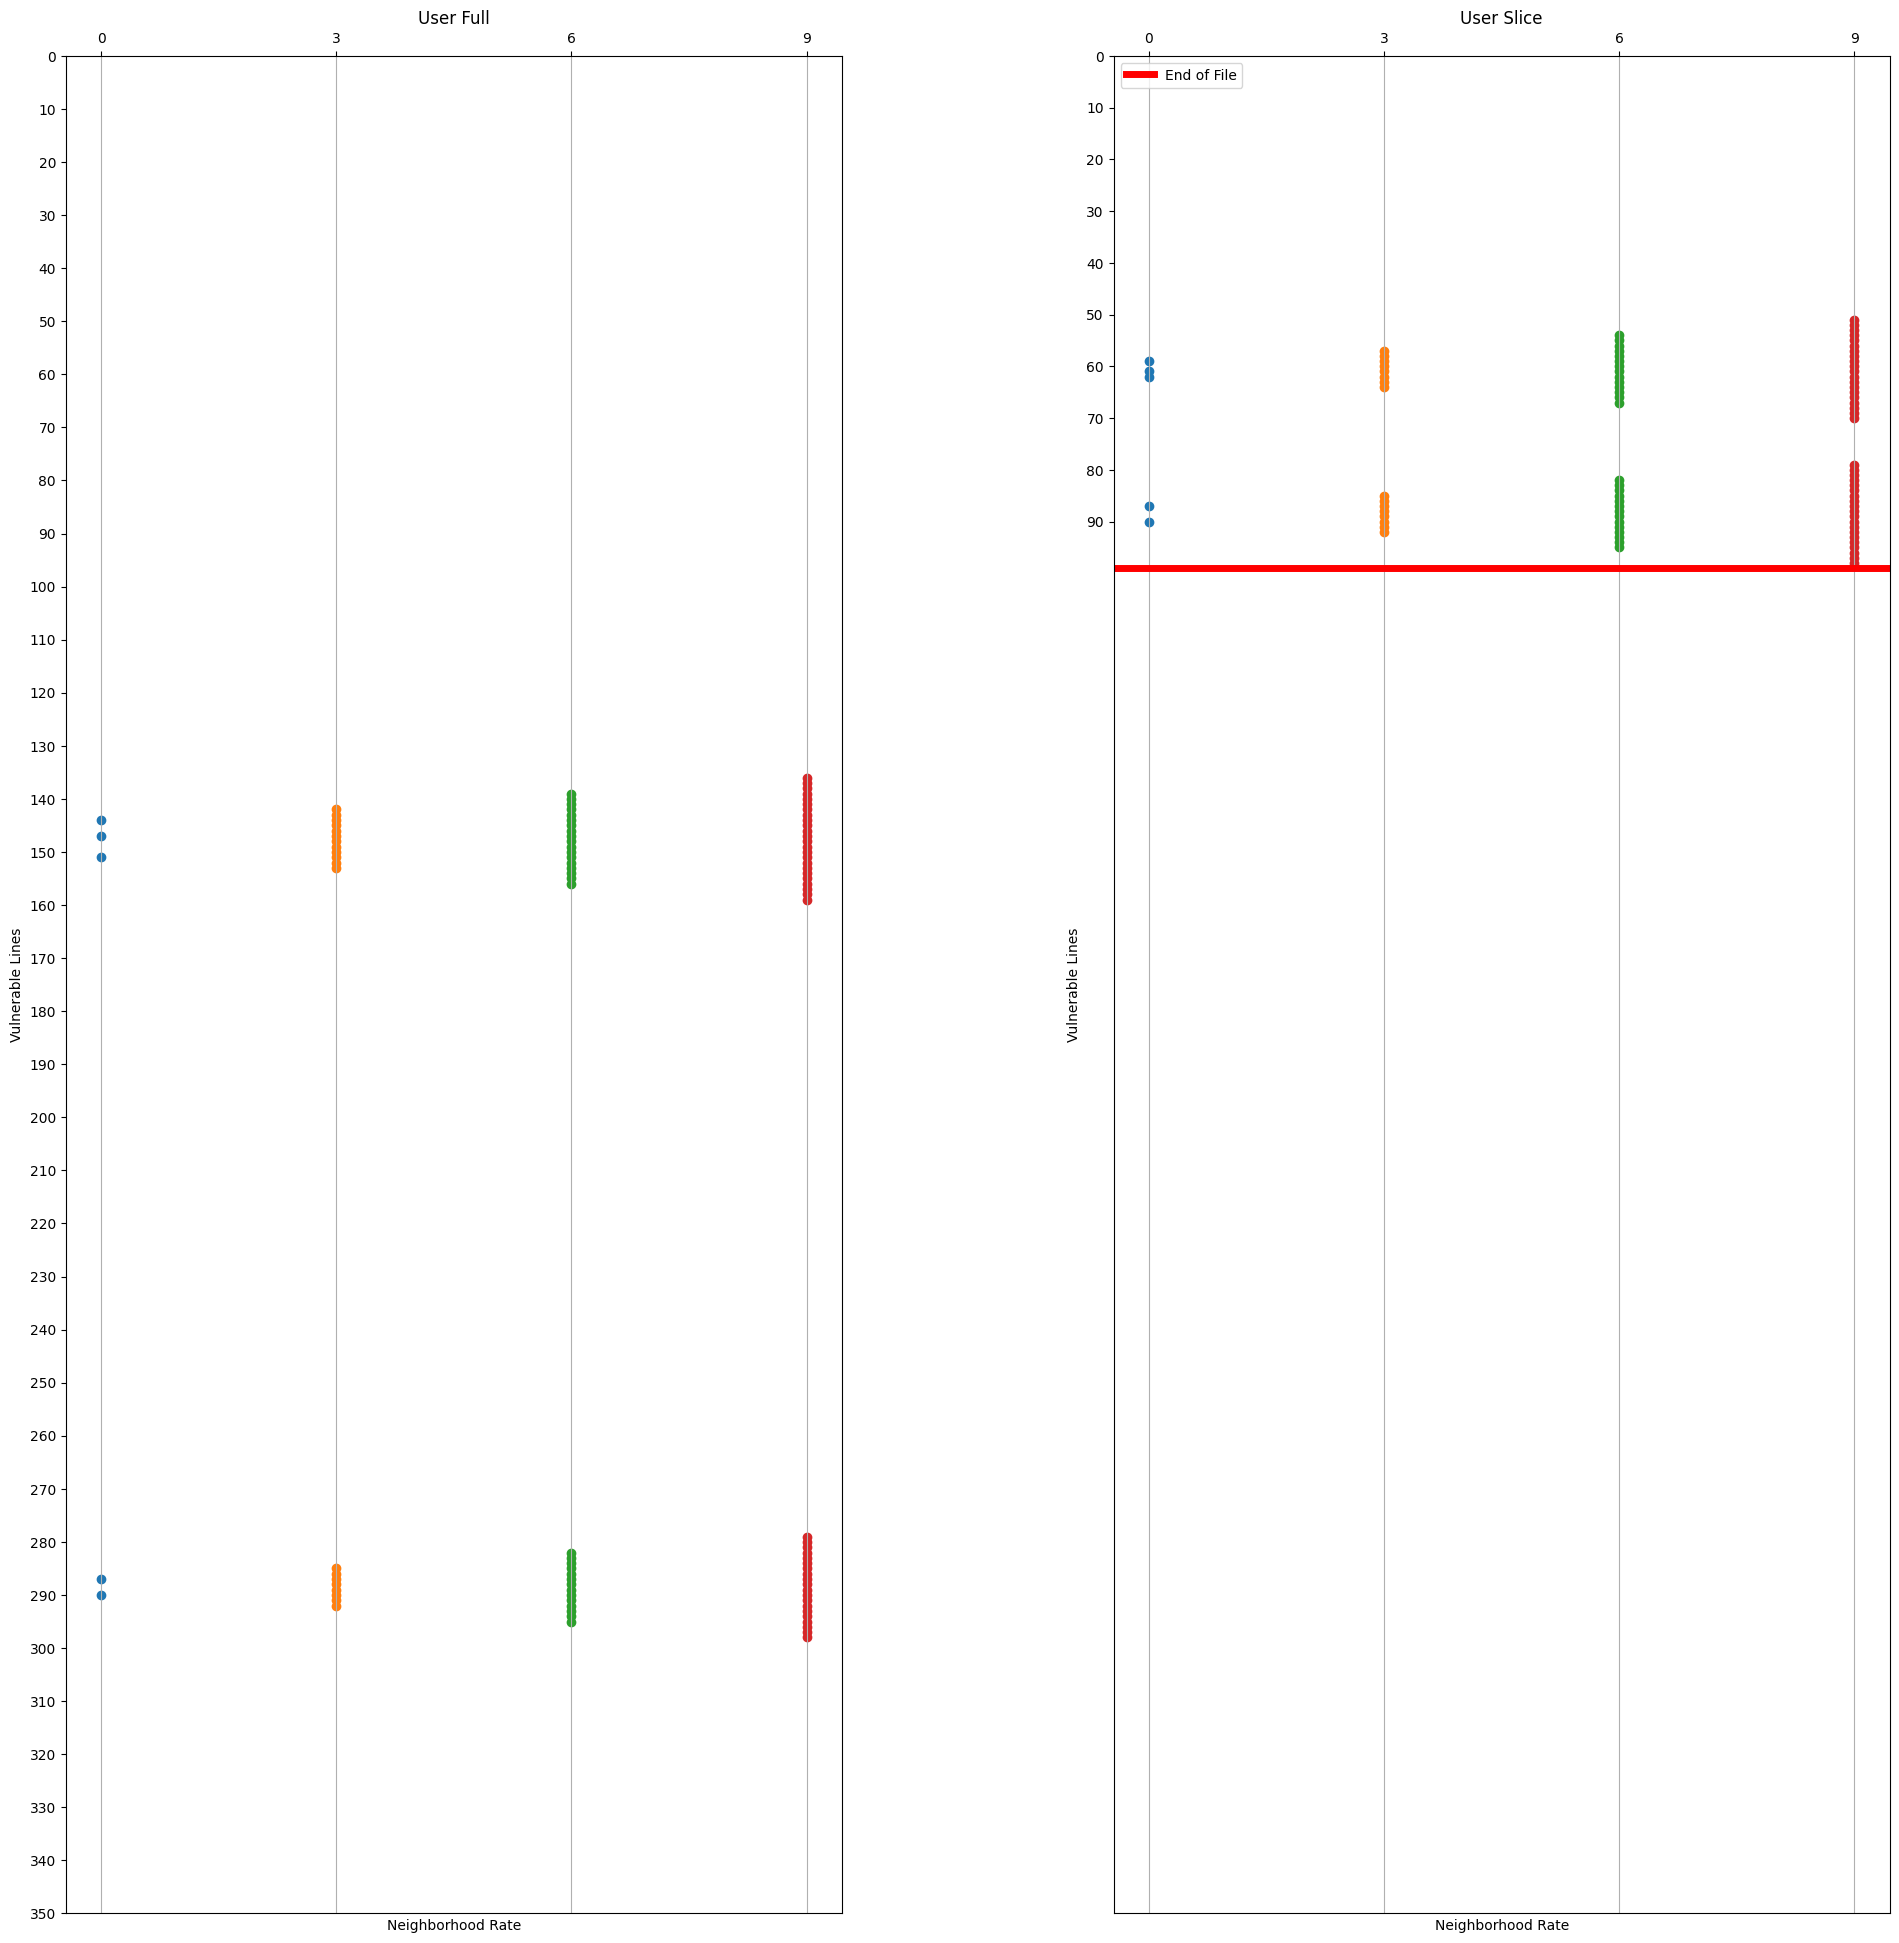

In [8]:
# FIGURE 2 SHOWING VULNERABLE LINES OF USERS

dict_user_slice = {0: user_slice, 3: user_slice_neighborhood3, 6: user_slice_neighborhood6, 9: user_slice_neighborhood9}
dict_user_full = {0: user_full, 3: user_full_neighborhood3, 6: user_full_neighborhood6, 9: user_full_neighborhood9}

plt.subplot(1, 2, 1)
for xe, ye in dict_user_full.items():
  plt.scatter([xe] * len(ye), ye)
plt.title("User Full")
plt.xlabel('Neighborhood Rate')
plt.ylabel('Vulnerable Lines')
plt.grid(axis='x')
plt.xticks(range(0, 10, 3))
plt.yticks(range(0,359,10))
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()

plt.subplot(1, 2, 2)
for xe, ye in dict_user_slice.items():
  plt.scatter([xe] * len(ye), ye)
plt.title("User Slice")
plt.xlabel('Neighborhood Rate')
plt.ylabel('Vulnerable Lines')
plt.grid(axis='x')
plt.xticks(range(0, 10, 3))
plt.yticks(range(0,99,10))
plt.ylim(0,359)
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()
plt.axhline(y=99, linewidth=5, label= 'End of File', color='red')
plt.legend(loc = 'upper left')

plt.subplots_adjust(top=5.95, bottom=2.08, left=2.10, right=4.95, hspace=0.25,
                    wspace=0.35)
plt.show()

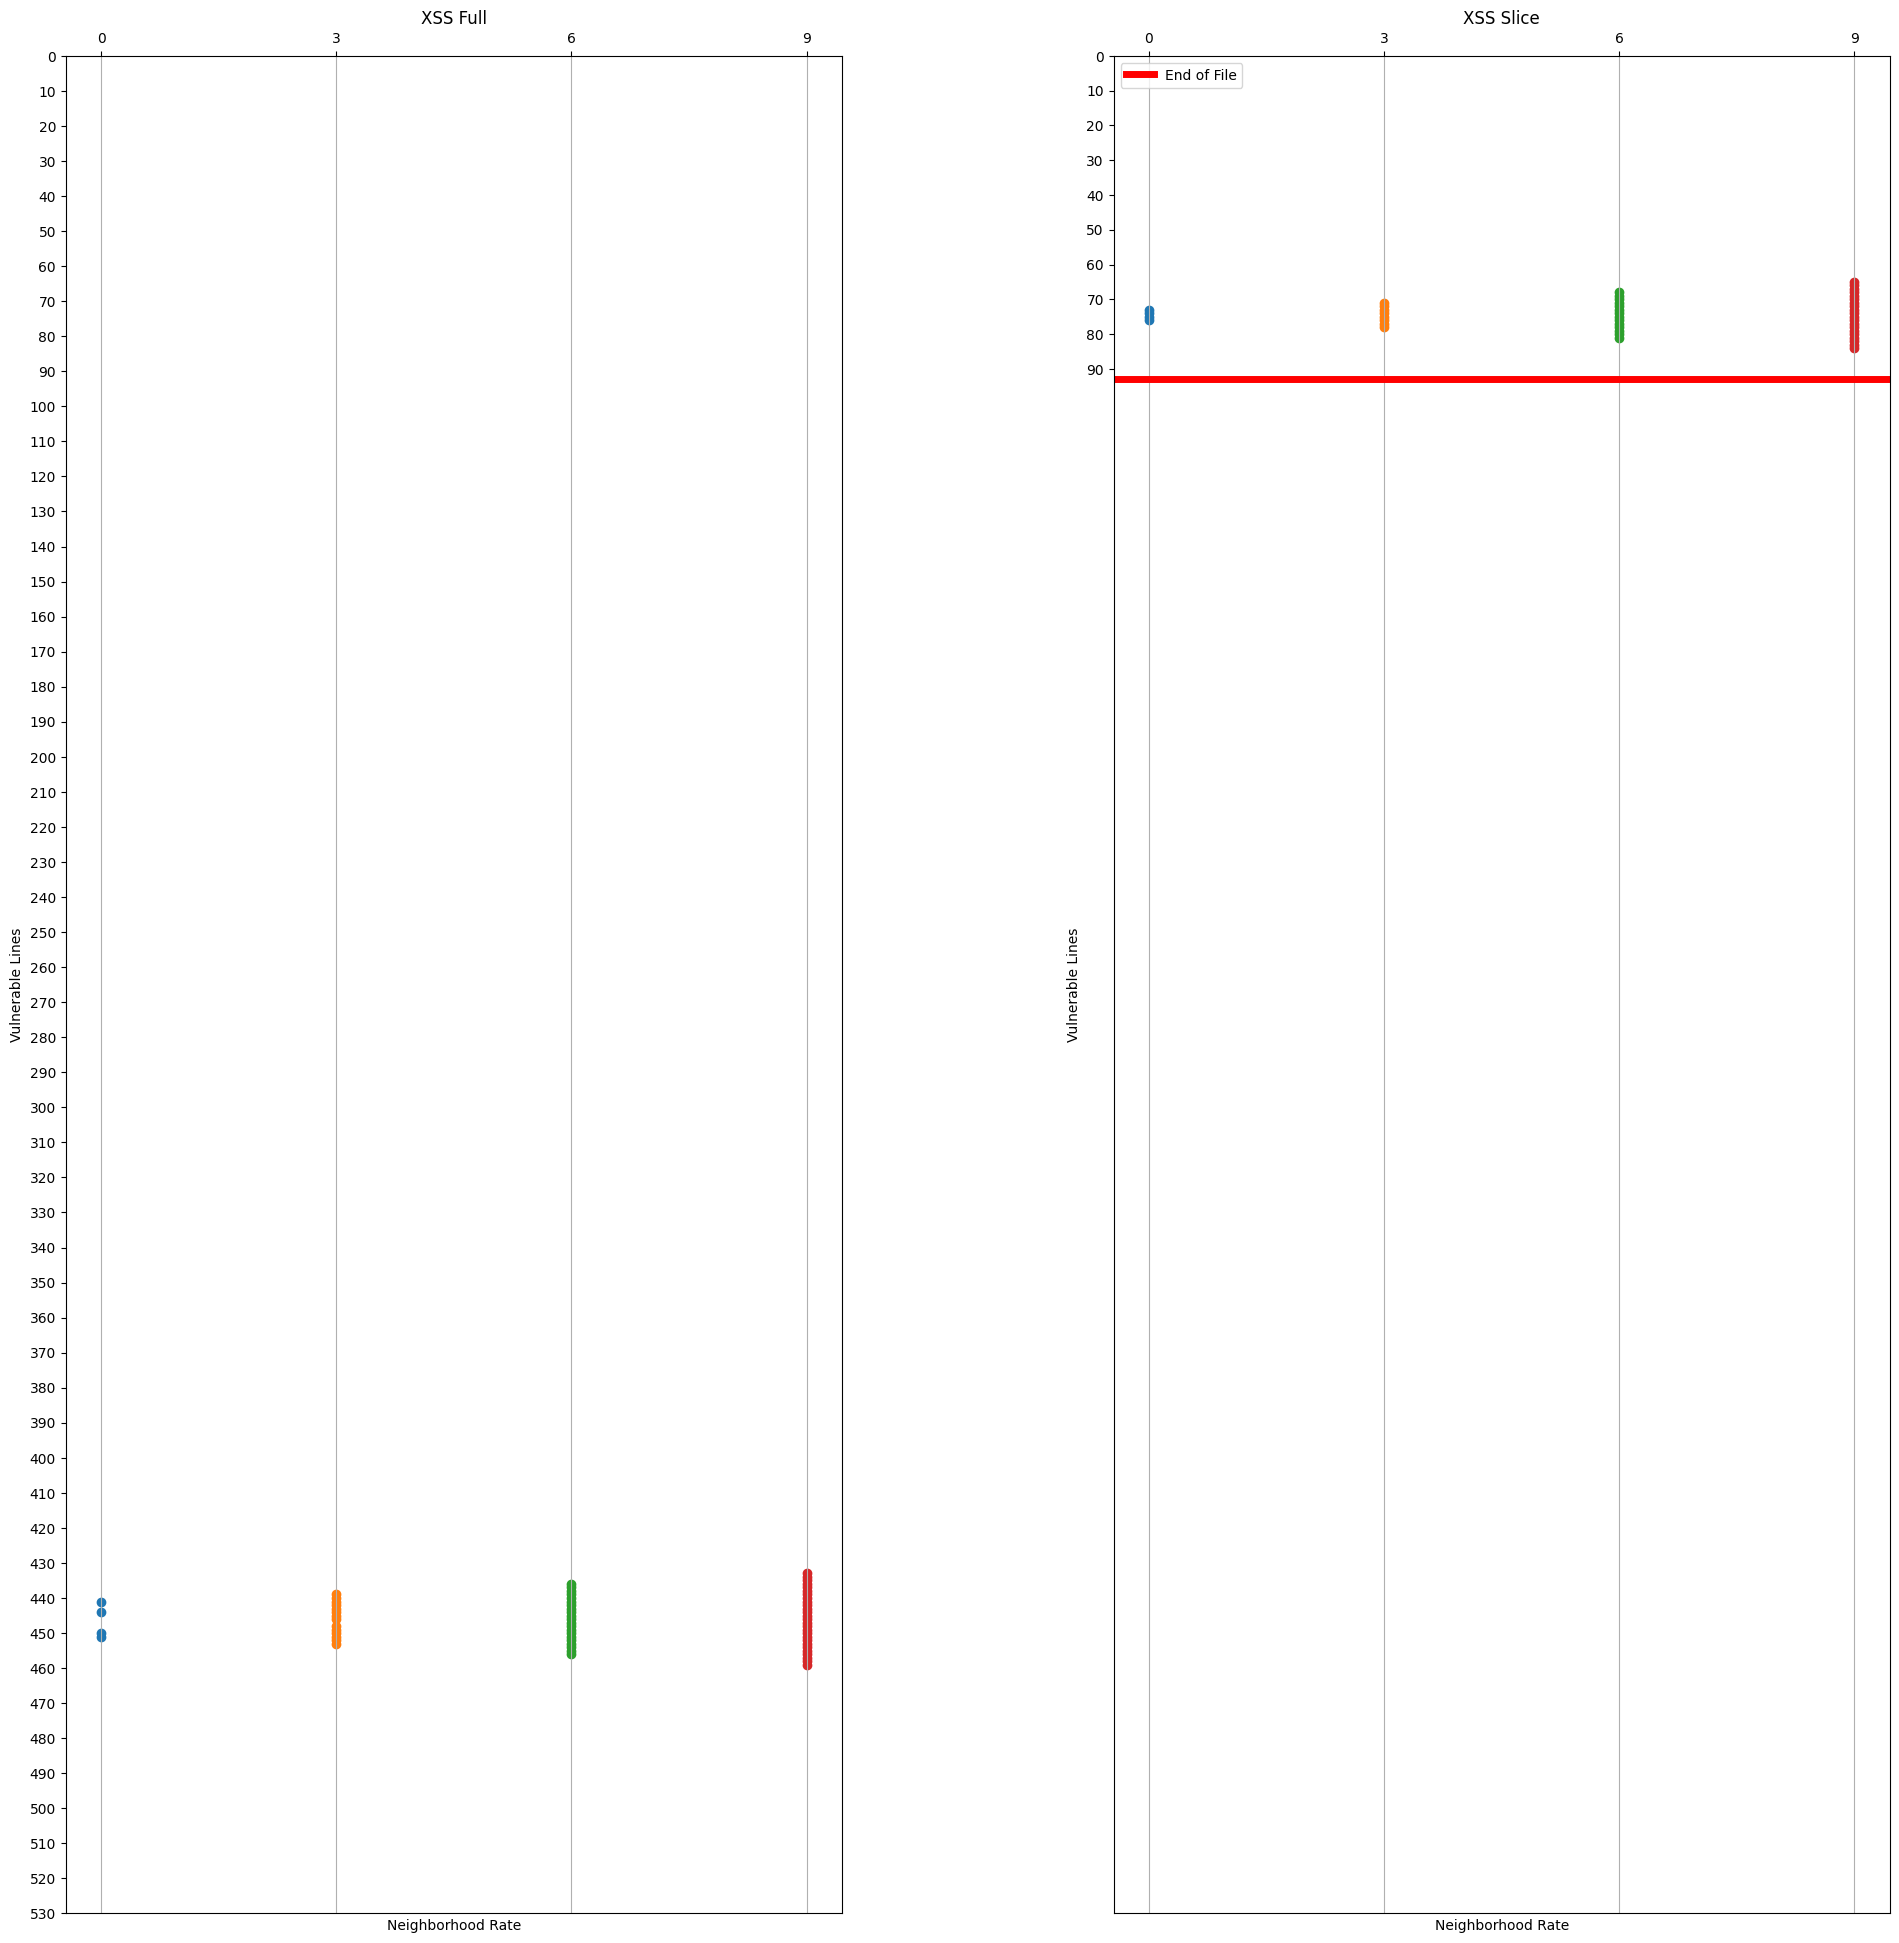

In [9]:
# FIGURE 3 SHOWING VULNERABLE LINES OF XSS

dict_xss_slice = {0: xss_slice, 3: xss_slice_neighborhood3, 6: xss_slice_neighborhood6, 9: xss_slice_neighborhood9}
dict_xss_full = {0: xss_full, 3: xss_full_neighborhood3, 6: xss_full_neighborhood6, 9: xss_full_neighborhood9}

plt.subplot(1, 2, 1)
for xe, ye in dict_xss_full.items():
  plt.scatter([xe] * len(ye), ye)
plt.title("XSS Full")
plt.xlabel('Neighborhood Rate')
plt.ylabel('Vulnerable Lines')
plt.grid(axis='x')
plt.xticks(range(0, 10, 3))
plt.yticks(range(0, 534, 10))
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()

plt.subplot(1, 2, 2)
for xe, ye in dict_xss_slice.items():
  plt.scatter([xe] * len(ye), ye)
plt.title("XSS Slice")
plt.xlabel('Neighborhood Rate')
plt.ylabel('Vulnerable Lines')
plt.grid(axis='x')
plt.xticks(range(0, 10, 3))
plt.yticks(range(0, 93, 10))
plt.ylim(0,534)
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()
plt.axhline(y=93, linewidth=5, label= 'End of File', color='red')
plt.legend(loc = 'upper left')

plt.subplots_adjust(top=5.95, bottom=2.08, left=2.10, right=4.95, hspace=0.25,
                    wspace=0.35)
plt.show()

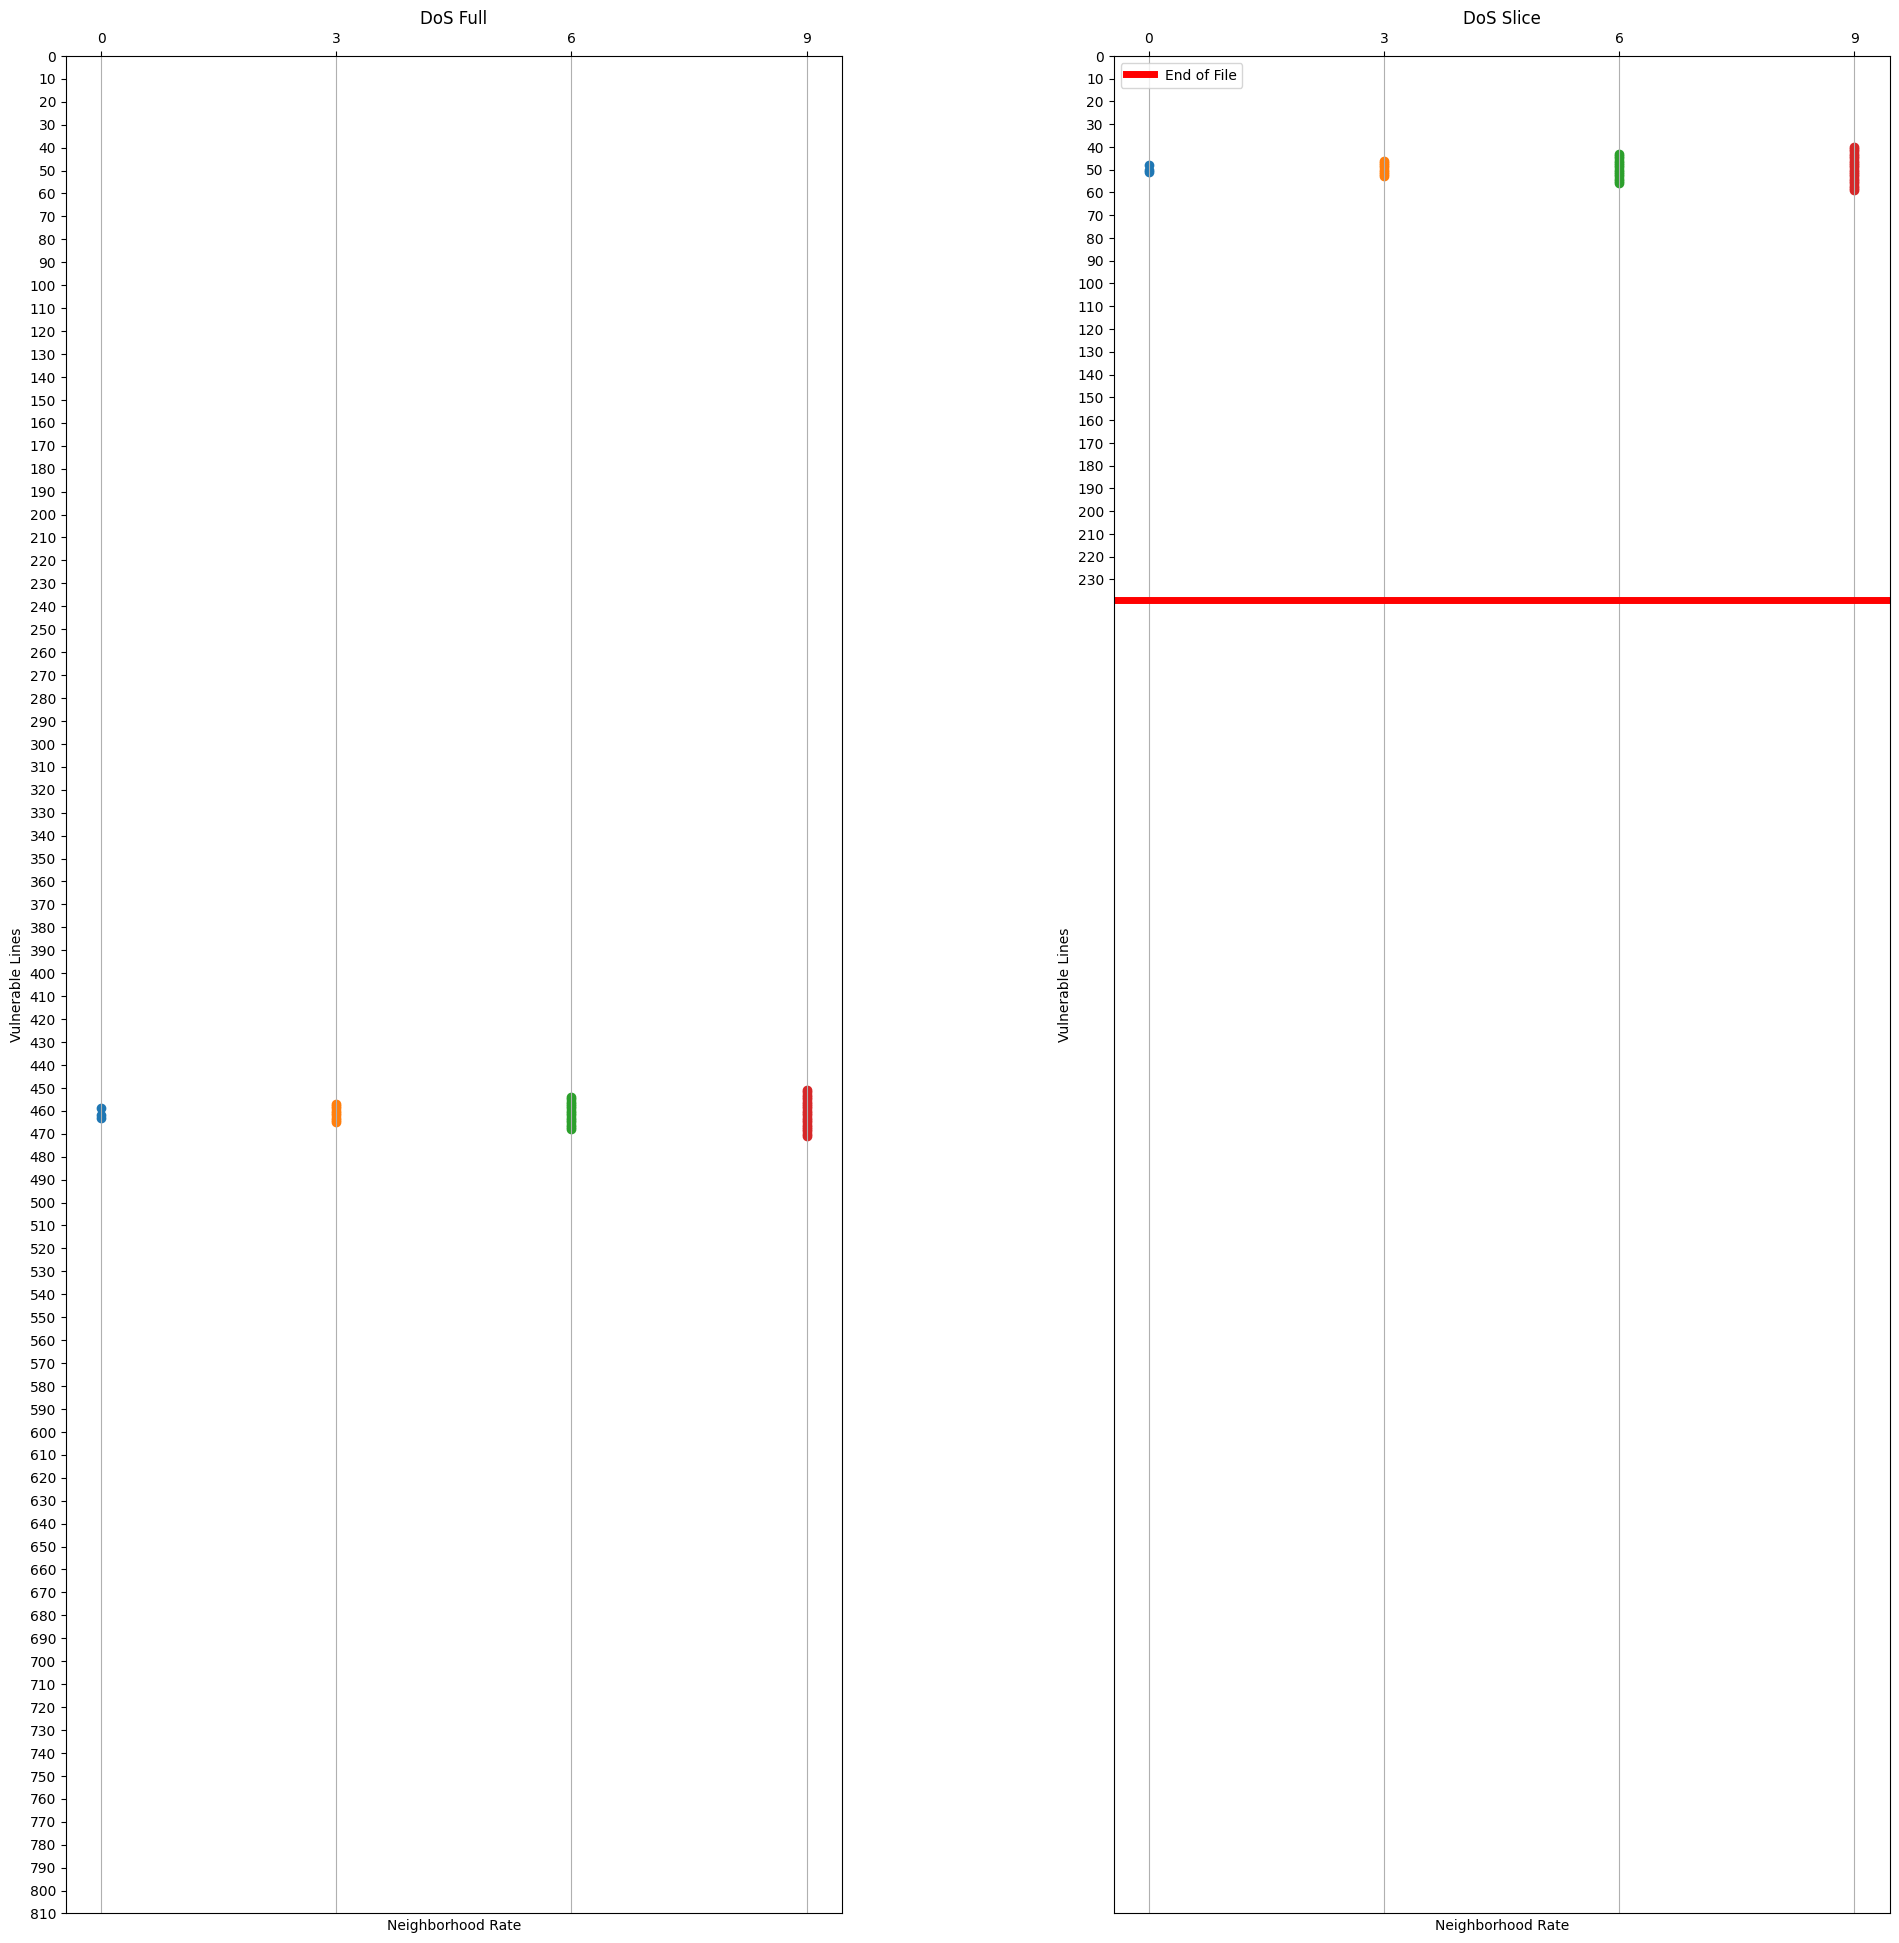

In [10]:
dict_dos_slice = {0: dos_slice, 3: dos_slice_neighborhood3, 6: dos_slice_neighborhood6, 9: dos_slice_neighborhood9}
dict_dos_full = {0: dos_full, 3: dos_full_neighborhood3, 6: dos_full_neighborhood6, 9: dos_full_neighborhood9}

plt.subplot(1, 2, 1)
for xe, ye in dict_dos_full.items():
  plt.scatter([xe] * len(ye), ye)
plt.title("DoS Full")
plt.xlabel('Neighborhood Rate')
plt.ylabel('Vulnerable Lines')
plt.grid(axis='x')
plt.xticks(range(0, 10, 3))
plt.yticks(range(0, 816, 10))
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()

plt.subplot(1, 2, 2)
for xe, ye in dict_dos_slice.items():
  plt.scatter([xe] * len(ye), ye)
plt.title("DoS Slice")
plt.xlabel('Neighborhood Rate')
plt.ylabel('Vulnerable Lines')
plt.grid(axis='x')
plt.xticks(range(0, 10, 3))
plt.yticks(range(0, 239, 10))
plt.ylim(0,816)
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()
plt.axhline(y=239, linewidth=5, label= 'End of File', color='red')
plt.legend(loc = 'upper left')

plt.subplots_adjust(top=5.95, bottom=2.08, left=2.10, right=4.95, hspace=0.25,
                    wspace=0.35)
plt.show()

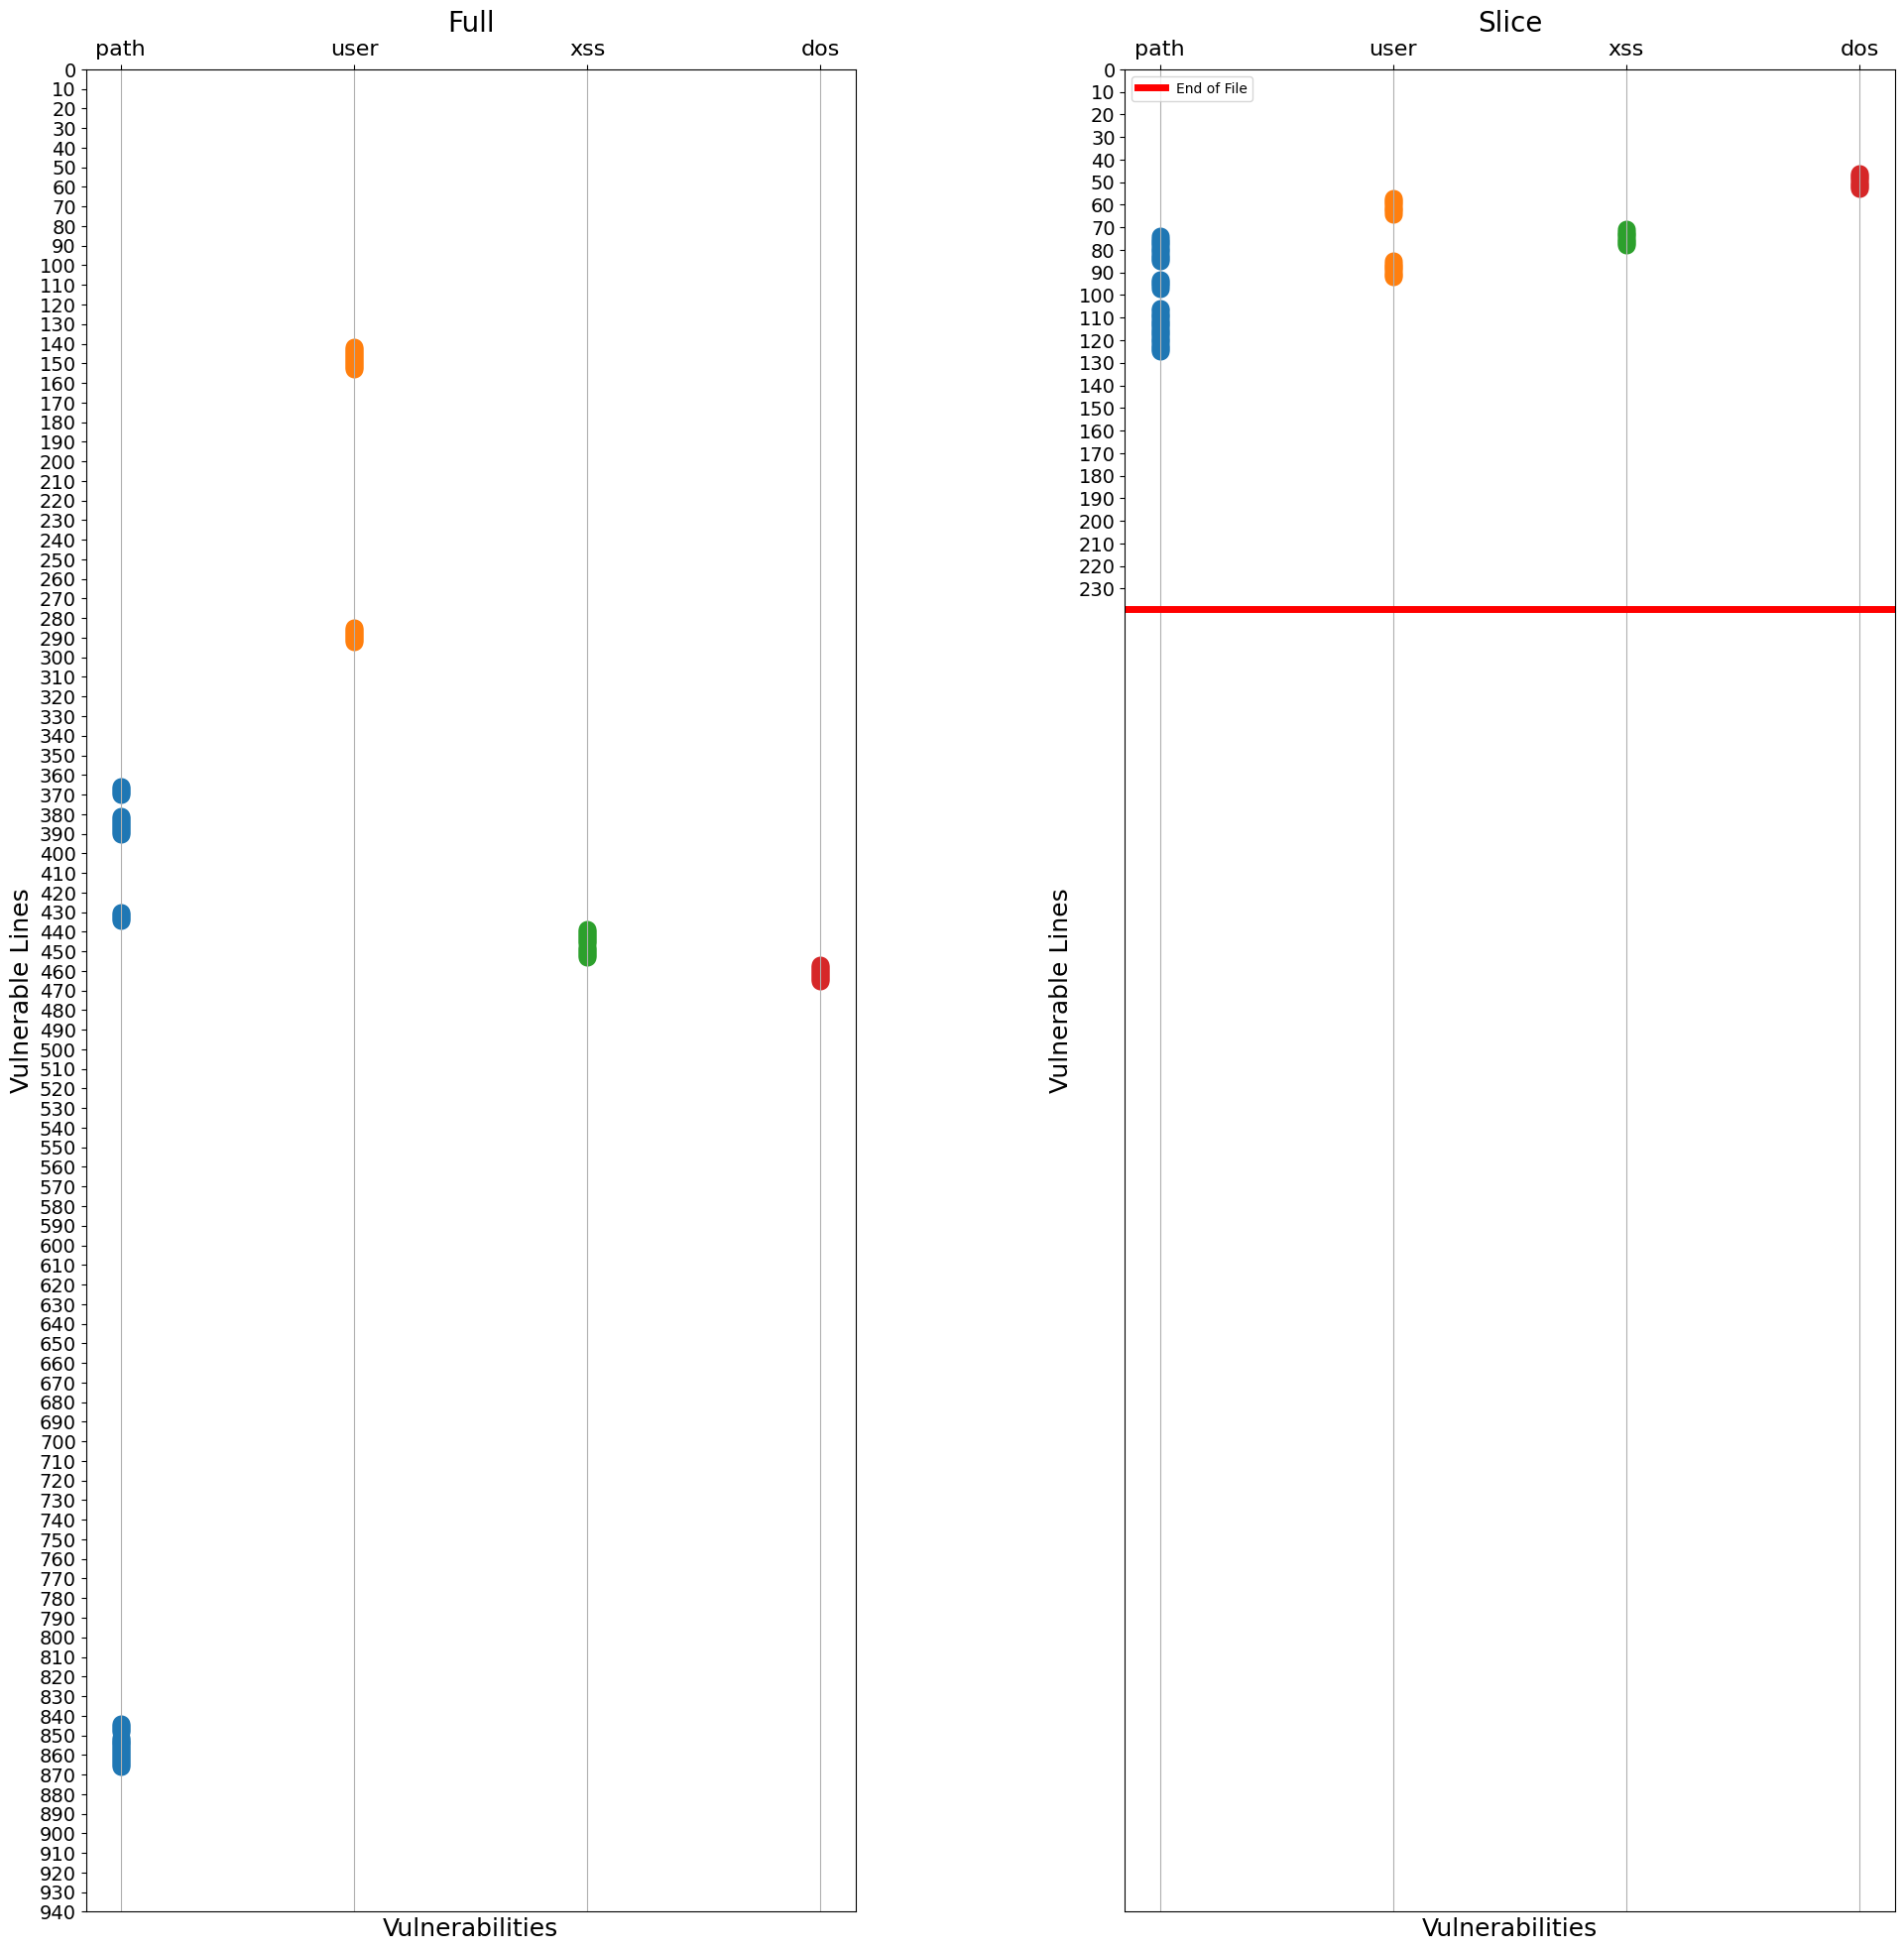

In [11]:
dict_slice = {0: path_slice_neighborhood3, 3: user_slice_neighborhood3, 6: xss_slice_neighborhood3, 9: dos_slice_neighborhood3}
dict_full = {0: path_full_neighborhood3, 3: user_full_neighborhood3, 6: xss_full_neighborhood3, 9: dos_full_neighborhood3}
labels = ['path', 'user', 'xss', 'dos']

fig=plt.figure()

plt.subplot(1, 2, 1)
for xe, ye in dict_full.items():
  plt.scatter([xe] * len(ye), ye, linewidths=7)
plt.title("Full", fontsize=20)
plt.xlabel('Vulnerabilities', fontsize=18)
plt.ylabel('Vulnerable Lines', fontsize=18)
plt.grid(axis='x')
plt.xticks(range(0, 10, 3), labels, fontsize=16)
plt.yticks(range(0, 950, 10), fontsize=14)
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()

plt.subplot(1, 2, 2)
for xe, ye in dict_slice.items():
  plt.scatter([xe] * len(ye), ye, linewidths=7)
plt.title("Slice", fontsize=20)
plt.xlabel('Vulnerabilities', fontsize=18)
plt.ylabel('Vulnerable Lines', fontsize=18)
plt.grid(axis='x')
plt.xticks(range(0, 10, 3), labels, fontsize=16)
plt.yticks(range(0, 239, 10), fontsize=14)
plt.ylim(0,816)
ax=plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.xaxis.tick_top()
plt.axhline(y=239, linewidth=5, label= 'End of File', color='red')
plt.legend(loc = 'upper left')

plt.subplots_adjust(top=5.95, bottom=2.08, left=2.10, right=4.95, hspace=0.25,
                    wspace=0.35)

fig.savefig('qualitative-analysis.png', dpi=100)
plt.show()

In [12]:
#convert group_id to int
finding_vuln_data['Group'] = finding_vuln_data['Group'].apply(lambda x: int(x))

#process path responses
finding_vuln_data['Path'] = finding_vuln_data['Path'].apply(lambda x: str(x))
finding_vuln_data['Path'] = finding_vuln_data['Path'].apply(lambda x: x.split(','))
finding_vuln_data['Path'] = finding_vuln_data['Path'].apply(lambda x: [int(i) for i in x])

#process user resposes
finding_vuln_data['User'] = finding_vuln_data['User'].apply(lambda x: str(x))
finding_vuln_data['User'] = finding_vuln_data['User'].apply(lambda x: x.split(','))
finding_vuln_data['User'] = finding_vuln_data['User'].apply(lambda x: [int(i) for i in x])

#process xss responses
finding_vuln_data['XSS'] = finding_vuln_data['XSS'].apply(lambda x: str(x))
finding_vuln_data['XSS'] = finding_vuln_data['XSS'].apply(lambda x: x.split(','))
finding_vuln_data['XSS'] = finding_vuln_data['XSS'].apply(lambda x: [int(i) for i in x])

#process dos responses
finding_vuln_data['DoS'] = finding_vuln_data['DoS'].apply(lambda x: str(x))
finding_vuln_data['DoS'] = finding_vuln_data['DoS'].apply(lambda x: x.split(','))
finding_vuln_data['DoS'] = finding_vuln_data['DoS'].apply(lambda x: [int(i) for i in x])

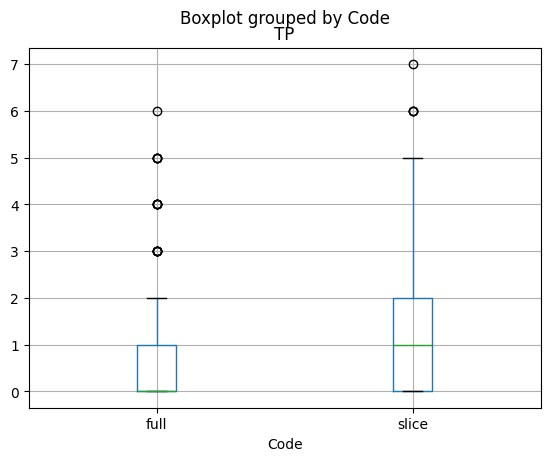

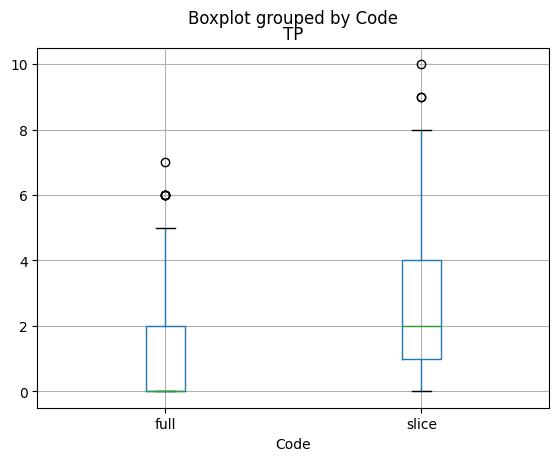

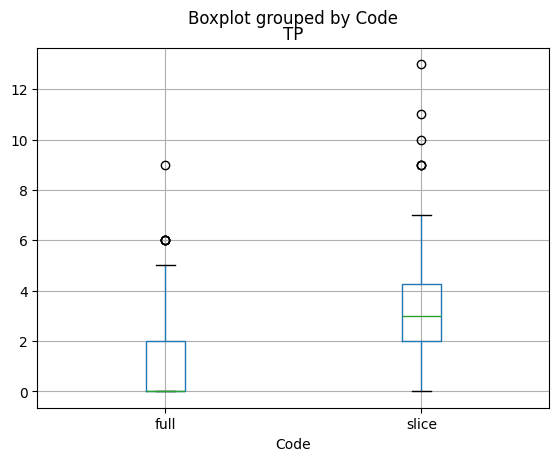

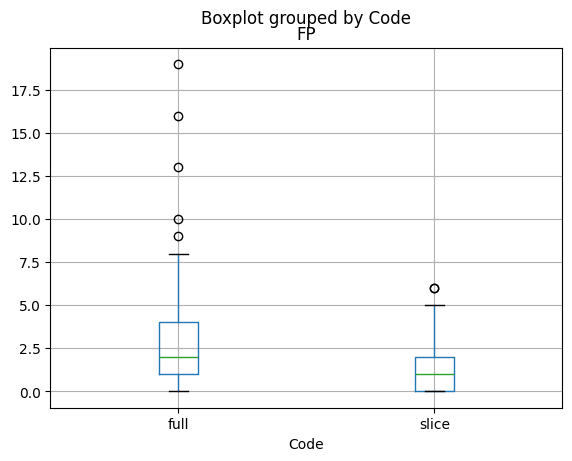

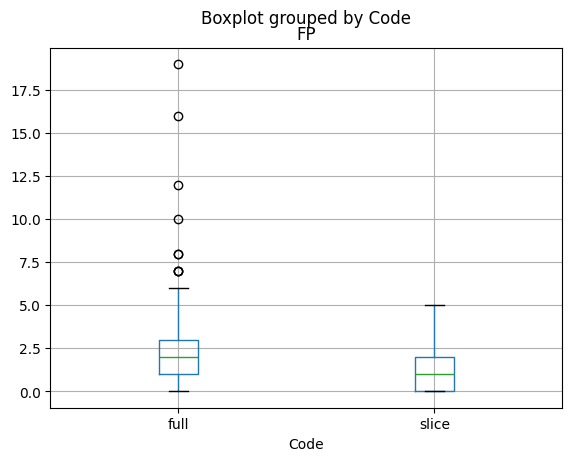

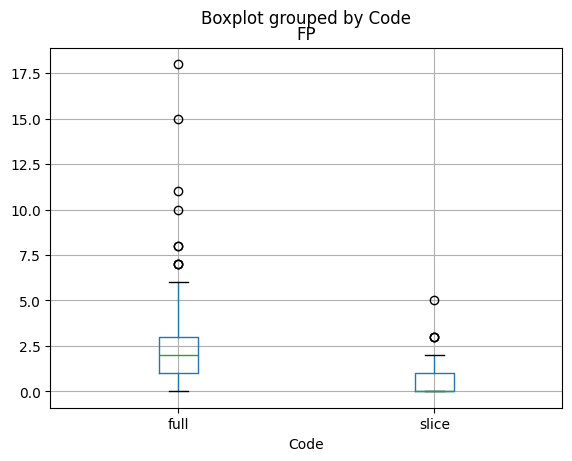

In [13]:
df_path = pd.DataFrame()
path_studentID = []
path_tp = []
path_fp = []
path_fn = []
path_neighborhood = []
path_code = []

def create_dataframe_path_neighborhood(uniqueID, neighborhood_rate, vulnerability, code, answers_line):
  tp = 0
  fp = 0
  fn = 0

  path_dict = dict.fromkeys(vulnerability, False)
  answers_line_dict = dict.fromkeys(answers_line, False)

  for ground_truth_line in vulnerability:
    participant_line_it = 0
    ground_truth_line_neighborhood = []
    if neighborhood_rate == 0:
      ground_truth_line_neighborhood = [ground_truth_line]
    else:
      ground_truth_line_neighborhood = np.arange(ground_truth_line - neighborhood_rate, ground_truth_line + neighborhood_rate + 1)

    while participant_line_it < len(answers_line):
      if answers_line[participant_line_it] in ground_truth_line_neighborhood:
        if path_dict[ground_truth_line] == False:
          tp = tp + 1
          path_dict.update({ground_truth_line: True})
        answers_line_dict.update({answers_line[participant_line_it]: True})
      participant_line_it+=1

  fp = sum(x == False for x in answers_line_dict.values())
  fn = sum(x == False for x in path_dict.values())

  path_studentID.append(uniqueID)
  path_tp.append(tp)
  path_fp.append(fp)
  path_fn.append(fn)
  path_neighborhood.append(neighborhood_rate)
  path_code.append(code)

for n in range(0, 10, 1):
  for index, row in finding_vuln_data.iterrows():
    if finding_vuln_data.loc[index, 'Group'] == 2 or finding_vuln_data.loc[index, 'Group'] == 3 or finding_vuln_data.loc[index, 'Group'] == 6:
      create_dataframe_path_neighborhood(finding_vuln_data.loc[index, 'UniqueID'], n, path_slice, 'slice', finding_vuln_data.loc[index, 'Path'])
    elif finding_vuln_data.loc[index, 'Group'] == 1 or finding_vuln_data.loc[index, 'Group'] == 4 or finding_vuln_data.loc[index, 'Group'] == 5:
      create_dataframe_path_neighborhood(finding_vuln_data.loc[index, 'UniqueID'], n, path_full, 'full', finding_vuln_data.loc[index, 'Path'])


df_path['UniqueID'] = path_studentID
df_path['TP'] = path_tp
df_path['FP'] = path_fp
df_path['FN'] = path_fn
df_path['Neighborhood'] = path_neighborhood
df_path['Code'] = path_code

df_path.loc[df_path['Neighborhood']==0].boxplot(column=['TP'], by="Code")
plt.show()

df_path.loc[df_path['Neighborhood']==1].boxplot(column=['TP'], by="Code")
plt.show()

df_path.loc[df_path['Neighborhood']==2].boxplot(column=['TP'], by="Code")
plt.show()

'''
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(df_path)
'''

df_path.loc[df_path['Neighborhood']==0].boxplot(column=['FP'], by="Code")
plt.show()

df_path.loc[df_path['Neighborhood']==1].boxplot(column=['FP'], by="Code")
plt.show()

df_path.loc[df_path['Neighborhood']==2].boxplot(column=['FP'], by="Code")
plt.show()


In [14]:
display(df_path.loc[df_path['Neighborhood']==3])

UniqueID  TP  FP  FN  Neighborhood   Code
792   Group1-2017-ID01   0   2  13             3   full
793   Group1-2017-ID02   0   1  13             3   full
794   Group1-2017-ID03   0   4  13             3   full
795   Group1-2017-ID04   3   1  10             3   full
796   Group1-2017-ID05   0   1  13             3   full
...                ...  ..  ..  ..           ...    ...
1051  Group5-2023-ID16   0   2  13             3   full
1052  Group6-2023-ID16   0   2  13             3  slice
1053  Group6-2023-ID17   0   1  13             3  slice
1054  Group6-2023-ID18   0   2  13             3  slice
1055  Group6-2023-ID19   0   2  13             3  slice

[264 rows x 6 columns]

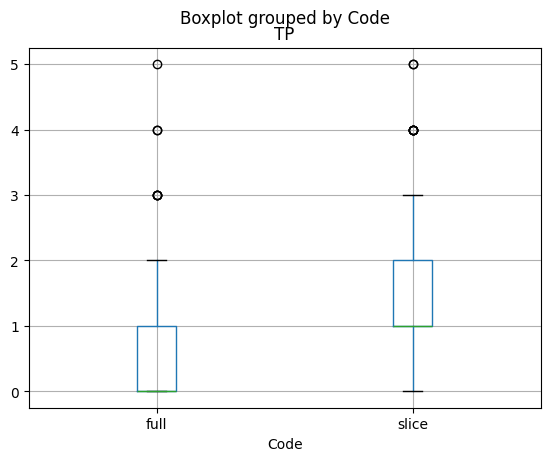

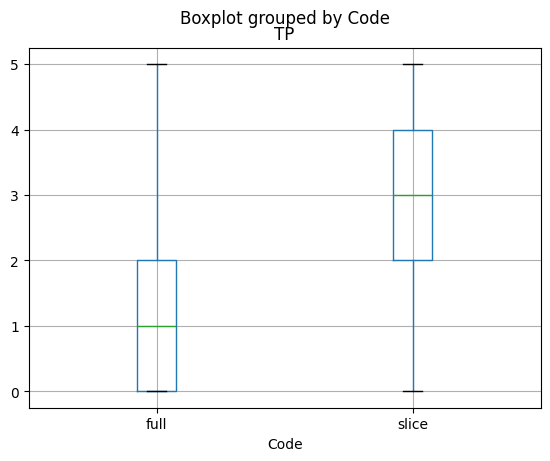

"\nwith pd.option_context('display.max_rows', None,\n                       'display.max_columns', None,\n                       'display.precision', 3,\n                       ):\n  print(df_user)\n"

In [15]:
df_user = pd.DataFrame()
user_studentID = []
user_tp = []
user_fp = []
user_fn = []
user_neighborhood = []
user_code = []

def create_dataframe_user_neighborhood(uniqueID, neighborhood_rate, vulnerability, code, answers_line):
  tp = 0
  fp = 0
  fn = 0

  user_dict = dict.fromkeys(vulnerability, False)
  answers_line_dict = dict.fromkeys(answers_line, False)

  for ground_truth_line in vulnerability:
    participant_line_it = 0
    ground_truth_line_neighborhood = []
    if neighborhood_rate == 0:
      ground_truth_line_neighborhood = [ground_truth_line]
    else:
      ground_truth_line_neighborhood = np.arange(ground_truth_line - neighborhood_rate, ground_truth_line + neighborhood_rate + 1)

    while participant_line_it < len(answers_line):
      if answers_line[participant_line_it] in ground_truth_line_neighborhood:
        if user_dict[ground_truth_line] == False:
          tp = tp + 1
          user_dict.update({ground_truth_line: True})
        answers_line_dict.update({answers_line[participant_line_it]: True})
      participant_line_it+=1

  fp = sum(x == False for x in answers_line_dict.values())
  fn = sum(x == False for x in user_dict.values())

  user_studentID.append(uniqueID)
  user_tp.append(tp)
  user_fp.append(fp)
  user_fn.append(fn)
  user_neighborhood.append(neighborhood_rate)
  user_code.append(code)

for n in range(0, 10, 1):
  for index, row in finding_vuln_data.iterrows():
    if finding_vuln_data.loc[index, 'Group'] == 1 or finding_vuln_data.loc[index, 'Group'] == 3 or finding_vuln_data.loc[index, 'Group'] == 5:
      create_dataframe_user_neighborhood(finding_vuln_data.loc[index, 'UniqueID'], n, user_slice, 'slice', finding_vuln_data.loc[index, 'User'])
    elif finding_vuln_data.loc[index, 'Group'] == 2 or finding_vuln_data.loc[index, 'Group'] == 4 or finding_vuln_data.loc[index, 'Group'] == 6:
      create_dataframe_user_neighborhood(finding_vuln_data.loc[index, 'UniqueID'], n, user_full, 'full', finding_vuln_data.loc[index, 'User'])



df_user['UniqueID'] = user_studentID
df_user['TP'] = user_tp
df_user['FP'] = user_fp
df_user['FN'] = user_fn
df_user['Neighborhood'] = user_neighborhood
df_user['Code'] = user_code

df_user.loc[df_user['Neighborhood']==0].boxplot(column=['TP'], by="Code")
plt.show()

df_user.loc[df_user['Neighborhood']==3].boxplot(column=['TP'], by="Code")
plt.show()

'''
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(df_user)
'''

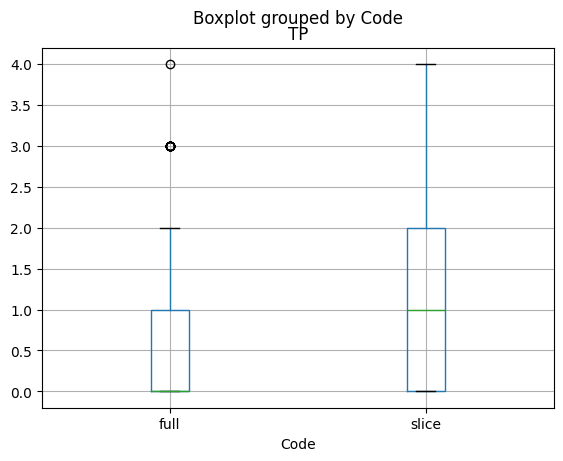

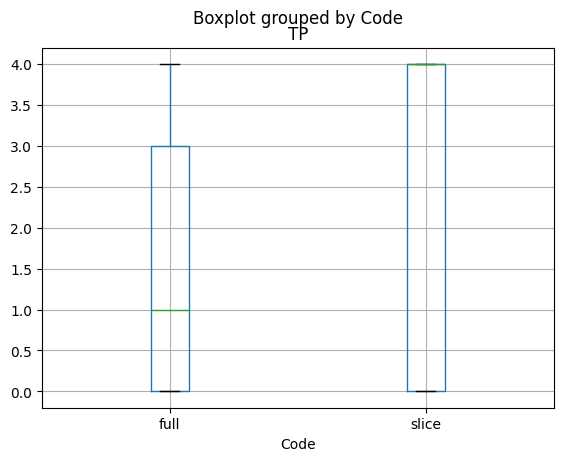

"\nwith pd.option_context('display.max_rows', None,\n                       'display.max_columns', None,\n                       'display.precision', 3,\n                       ):\n  print(df_xss)\n"

In [16]:
df_xss = pd.DataFrame()
xss_studentID = []
xss_tp = []
xss_fp = []
xss_fn = []
xss_neighborhood = []
xss_code = []

def create_dataframe_xss_neighborhood(uniqueID, neighborhood_rate, vulnerability, code, answers_line):
  tp = 0
  fp = 0
  fn = 0

  xss_dict = dict.fromkeys(vulnerability, False)
  answers_line_dict = dict.fromkeys(answers_line, False)

  for ground_truth_line in vulnerability:
    participant_line_it = 0
    ground_truth_line_neighborhood = []
    if neighborhood_rate == 0:
      ground_truth_line_neighborhood = [ground_truth_line]
    else:
      ground_truth_line_neighborhood = np.arange(ground_truth_line - neighborhood_rate, ground_truth_line + neighborhood_rate + 1)

    while participant_line_it < len(answers_line):
      if answers_line[participant_line_it] in ground_truth_line_neighborhood:
        if xss_dict[ground_truth_line] == False:
          tp = tp + 1
          xss_dict.update({ground_truth_line: True})
        answers_line_dict.update({answers_line[participant_line_it]: True})
      participant_line_it+=1

  fp = sum(x == False for x in answers_line_dict.values())
  fn = sum(x == False for x in xss_dict.values())

  xss_studentID.append(uniqueID)
  xss_tp.append(tp)
  xss_fp.append(fp)
  xss_fn.append(fn)
  xss_neighborhood.append(neighborhood_rate)
  xss_code.append(code)

for n in range(0, 10, 1):
  for index, row in finding_vuln_data.iterrows():
    if finding_vuln_data.loc[index, 'Group'] == 2 or finding_vuln_data.loc[index, 'Group'] == 4 or finding_vuln_data.loc[index, 'Group'] == 5:
      create_dataframe_xss_neighborhood(finding_vuln_data.loc[index, 'UniqueID'], n, xss_slice, 'slice', finding_vuln_data.loc[index, 'XSS'])
    elif finding_vuln_data.loc[index, 'Group'] == 1 or finding_vuln_data.loc[index, 'Group'] == 3 or finding_vuln_data.loc[index, 'Group'] == 6:
      create_dataframe_xss_neighborhood(finding_vuln_data.loc[index, 'UniqueID'], n, xss_full, 'full', finding_vuln_data.loc[index, 'XSS'])


df_xss['UniqueID'] = xss_studentID
df_xss['TP'] = xss_tp
df_xss['FP'] = xss_fp
df_xss['FN'] = xss_fn
df_xss['Neighborhood'] = xss_neighborhood
df_xss['Code'] = xss_code

df_xss.loc[df_xss['Neighborhood']==0].boxplot(column=['TP'], by="Code")
plt.show()

df_xss.loc[df_xss['Neighborhood']==3].boxplot(column=['TP'], by="Code")
plt.show()

'''
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(df_xss)
'''

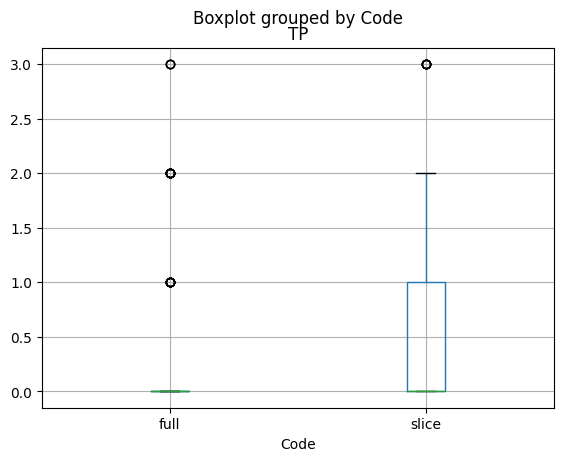

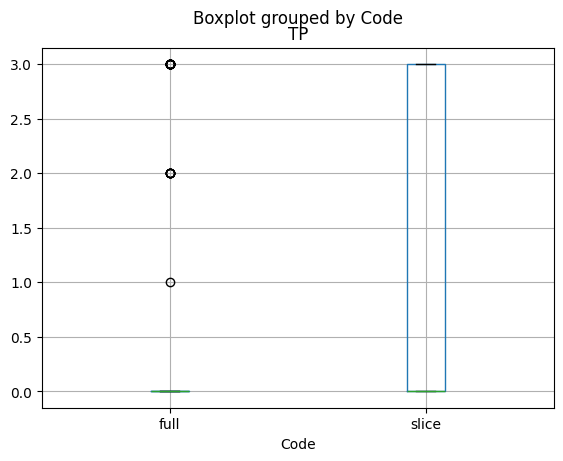

"\nwith pd.option_context('display.max_rows', None,\n                       'display.max_columns', None,\n                       'display.precision', 3,\n                       ):\n  print(df_dos)\n"

In [17]:
df_dos = pd.DataFrame()
dos_studentID = []
dos_tp = []
dos_fp = []
dos_fn = []
dos_neighborhood = []
dos_code = []

def create_dataframe_dos_neighborhood(uniqueID, neighborhood_rate, vulnerability, code, answers_line):
  tp = 0
  fp = 0
  fn = 0

  dos_dict = dict.fromkeys(vulnerability, False)
  answers_line_dict = dict.fromkeys(answers_line, False)

  for ground_truth_line in vulnerability:
    participant_line_it = 0
    ground_truth_line_neighborhood = []
    if neighborhood_rate == 0:
      ground_truth_line_neighborhood = [ground_truth_line]
    else:
      ground_truth_line_neighborhood = np.arange(ground_truth_line - neighborhood_rate, ground_truth_line + neighborhood_rate + 1)

    while participant_line_it < len(answers_line):
      if answers_line[participant_line_it] in ground_truth_line_neighborhood:
        if dos_dict[ground_truth_line] == False:
          tp = tp + 1
          dos_dict.update({ground_truth_line: True})
        answers_line_dict.update({answers_line[participant_line_it]: True})
      participant_line_it+=1

  fp = sum(x == False for x in answers_line_dict.values())
  fn = sum(x == False for x in dos_dict.values())

  dos_studentID.append(uniqueID)
  dos_tp.append(tp)
  dos_fp.append(fp)
  dos_fn.append(fn)
  dos_neighborhood.append(neighborhood_rate)
  dos_code.append(code)

for n in range(0, 10, 1):
  for index, row in finding_vuln_data.iterrows():
    if finding_vuln_data.loc[index, 'Group'] == 1 or finding_vuln_data.loc[index, 'Group'] == 4 or finding_vuln_data.loc[index, 'Group'] == 6:
      create_dataframe_dos_neighborhood(finding_vuln_data.loc[index, 'UniqueID'], n, dos_slice, 'slice', finding_vuln_data.loc[index, 'DoS'])
    elif finding_vuln_data.loc[index, 'Group'] == 2 or finding_vuln_data.loc[index, 'Group'] == 3 or finding_vuln_data.loc[index, 'Group'] == 5:
      create_dataframe_dos_neighborhood(finding_vuln_data.loc[index, 'UniqueID'], n, dos_full, 'full', finding_vuln_data.loc[index, 'DoS'])


df_dos['UniqueID'] = dos_studentID
df_dos['TP'] = dos_tp
df_dos['FP'] = dos_fp
df_dos['FN'] = dos_fn
df_dos['Neighborhood'] = dos_neighborhood
df_dos['Code'] = dos_code

df_dos.loc[df_dos['Neighborhood']==0].boxplot(column=['TP'], by="Code")
plt.show()

df_dos.loc[df_dos['Neighborhood']==3].boxplot(column=['TP'], by="Code")
plt.show()

'''
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(df_dos)
'''

In [18]:
df_all_vuln = pd.DataFrame()
uniqueID = []
treat = []
tp = []
fp = []
fn = []
delta = []
vulnerability = []

def create_df_all_vuln(all_vuln, vuln_name, vuln):
  for index, row in vuln.iterrows():
    uniqueID.append(vuln.loc[index, 'UniqueID'])
    treat.append(vuln.loc[index, 'Code'])
    vulnerability.append(vuln_name)
    tp.append(vuln.loc[index, 'TP'])
    fp.append(vuln.loc[index, 'FP'])
    fn.append(vuln.loc[index, 'FN'])
    delta.append(vuln.loc[index, 'Neighborhood'])

create_df_all_vuln(df_all_vuln, 'path', df_path)
create_df_all_vuln(df_all_vuln, 'user', df_user)
create_df_all_vuln(df_all_vuln, 'xss', df_xss)
create_df_all_vuln(df_all_vuln, 'dos', df_dos)

df_all_vuln['UniqueID'] = uniqueID
df_all_vuln['Treat'] = treat
df_all_vuln['Vulnerability'] = vulnerability
df_all_vuln['TP'] = tp
df_all_vuln['FP'] = fp
df_all_vuln['FN'] = fn
df_all_vuln['Delta'] = delta

'''
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(df_all_vuln)
'''

"\nwith pd.option_context('display.max_rows', None,\n                       'display.max_columns', None,\n                       'display.precision', 3,\n                       ):\n  print(df_all_vuln)\n"

In [19]:
display(df_all_vuln.loc[df_all_vuln['Delta']==3])

UniqueID  Treat Vulnerability  TP  FP  FN  Delta
792   Group1-2017-ID01   full          path   0   2  13      3
793   Group1-2017-ID02   full          path   0   1  13      3
794   Group1-2017-ID03   full          path   0   4  13      3
795   Group1-2017-ID04   full          path   3   1  10      3
796   Group1-2017-ID05   full          path   0   1  13      3
...                ...    ...           ...  ..  ..  ..    ...
8971  Group5-2023-ID16   full           dos   0   1   3      3
8972  Group6-2023-ID16  slice           dos   0   3   3      3
8973  Group6-2023-ID17  slice           dos   3   0   0      3
8974  Group6-2023-ID18  slice           dos   0   1   3      3
8975  Group6-2023-ID19  slice           dos   0   1   3      3

[1056 rows x 7 columns]

In [20]:
df_students_delta_three = pd.DataFrame()
df_students_delta_three['UniqueID'] = df_dos.loc[(df_dos['Neighborhood']==3)].UniqueID
df_students_delta_three['Path'] = df_path.loc[(df_path['Neighborhood']==3)].TP>0
df_students_delta_three['User'] = df_user.loc[(df_user['Neighborhood']==3)].TP>0
df_students_delta_three['XSS'] = df_xss.loc[(df_xss['Neighborhood']==3)].TP>0
df_students_delta_three['DoS'] = df_dos.loc[(df_dos['Neighborhood']==3)].TP>0

print(df_students_delta_three)

df_students_delta_three['sum'] = df_students_delta_three[['Path', 'User', 'XSS', 'DoS']].sum(1)

'''
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(df_students)
'''

df_students_delta_three['sum'].value_counts()

              UniqueID   Path   User    XSS    DoS
792   Group1-2017-ID01  False   True   True  False
793   Group1-2017-ID02  False   True   True  False
794   Group1-2017-ID03  False   True   True   True
795   Group1-2017-ID04   True   True   True   True
796   Group1-2017-ID05  False   True   True   True
...                ...    ...    ...    ...    ...
1051  Group5-2023-ID16  False   True   True  False
1052  Group6-2023-ID16  False  False   True  False
1053  Group6-2023-ID17  False  False   True   True
1054  Group6-2023-ID18  False  False  False  False
1055  Group6-2023-ID19  False  False  False  False

[264 rows x 5 columns]


sum
2    91
3    83
1    49
4    30
0    11
Name: count, dtype: int64

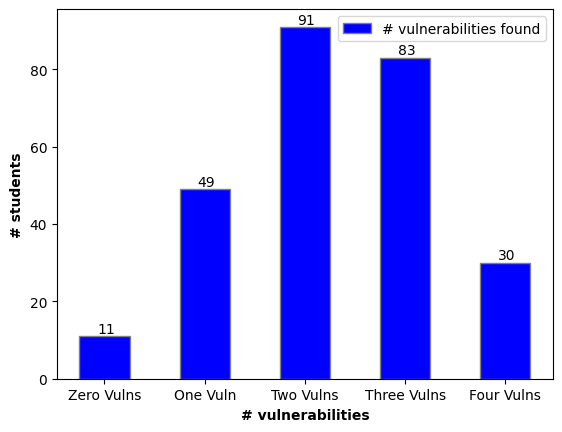

In [21]:
zero_vuln = 0
one_vuln = 0
two_vuln = 0
three_vuln = 0
four_vuln = 0

for index, row in df_students_delta_three.iterrows():
  if row['sum'] == 0:
    zero_vuln = zero_vuln + 1
  elif row['sum'] == 1:
    one_vuln = one_vuln + 1
  elif row['sum'] == 2:
    two_vuln = two_vuln + 1
  elif row['sum'] == 3:
    three_vuln = three_vuln + 1
  elif row['sum'] == 4:
    four_vuln = four_vuln + 1

# set width of bar
barWidth = 0.5
#fig = plt.subplots(figsize =(12, 8))

# set height of bar
num_vuln_found = [zero_vuln, one_vuln, two_vuln, three_vuln, four_vuln]

# Set position of bar on X axis
x_pos = np.arange(len(num_vuln_found))

# Make the plot
plt.bar(x_pos, num_vuln_found, color ='b', width = barWidth, edgecolor ='grey', label ='# vulnerabilities found')

# Adding Xticks
plt.xlabel('# vulnerabilities', fontweight ='bold', fontsize = 10)
plt.ylabel('# students', fontweight ='bold', fontsize = 10)
plt.xticks(x_pos, ['Zero Vulns', 'One Vuln', 'Two Vulns', 'Three Vulns', 'Four Vulns'])
#plt.title('Number of vulnerabilties found by the participants')

for i, v in enumerate(num_vuln_found):
    plt.text(x_pos[i] - 0.075, v + 0.8, str(v))

plt.legend()
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.savefig('vulnerabilities-found.png')
plt.show()

In [22]:
df_students_delta_zero = pd.DataFrame()
df_students_delta_zero['UniqueID'] = df_dos.loc[(df_dos['Neighborhood']==0)].UniqueID
df_students_delta_zero['Path'] = df_path.loc[(df_path['Neighborhood']==0)].TP>0
df_students_delta_zero['User'] = df_user.loc[(df_user['Neighborhood']==0)].TP>0
df_students_delta_zero['XSS'] = df_xss.loc[(df_xss['Neighborhood']==0)].TP>0
df_students_delta_zero['DoS'] = df_dos.loc[(df_dos['Neighborhood']==0)].TP>0

print(df_students_delta_zero)

df_students_delta_zero['sum'] = df_students_delta_zero[['Path', 'User', 'XSS', 'DoS']].sum(1)

'''
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(df_students)
'''

df_students_delta_zero['sum'].value_counts()

             UniqueID   Path   User    XSS    DoS
0    Group1-2017-ID01  False  False   True  False
1    Group1-2017-ID02  False  False   True  False
2    Group1-2017-ID03  False   True   True   True
3    Group1-2017-ID04   True   True   True   True
4    Group1-2017-ID05  False  False   True   True
..                ...    ...    ...    ...    ...
259  Group5-2023-ID16  False   True  False  False
260  Group6-2023-ID16  False  False  False  False
261  Group6-2023-ID17  False  False  False   True
262  Group6-2023-ID18  False  False  False  False
263  Group6-2023-ID19  False  False  False  False

[264 rows x 5 columns]


sum
1    78
2    76
3    56
0    29
4    25
Name: count, dtype: int64

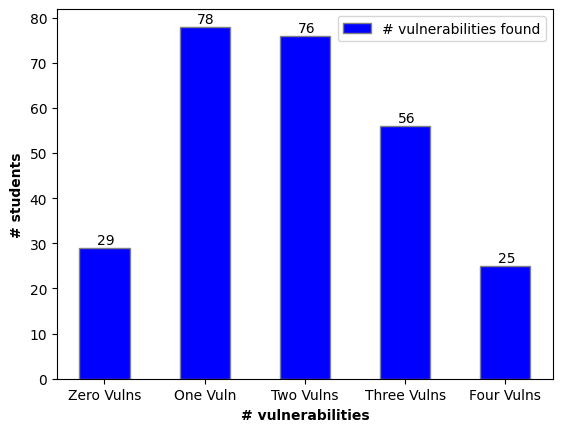

In [23]:
zero_vuln = 0
one_vuln = 0
two_vuln = 0
three_vuln = 0
four_vuln = 0

for index, row in df_students_delta_zero.iterrows():
  if row['sum'] == 0:
    zero_vuln = zero_vuln + 1
  elif row['sum'] == 1:
    one_vuln = one_vuln + 1
  elif row['sum'] == 2:
    two_vuln = two_vuln + 1
  elif row['sum'] == 3:
    three_vuln = three_vuln + 1
  elif row['sum'] == 4:
    four_vuln = four_vuln + 1

# set width of bar
barWidth = 0.5
#fig = plt.subplots(figsize =(12, 8))

# set height of bar
num_vuln_found = [zero_vuln, one_vuln, two_vuln, three_vuln, four_vuln]

# Set position of bar on X axis
x_pos = np.arange(len(num_vuln_found))

# Make the plot
plt.bar(x_pos, num_vuln_found, color ='b', width = barWidth, edgecolor ='grey', label ='# vulnerabilities found')

# Adding Xticks
plt.xlabel('# vulnerabilities', fontweight ='bold', fontsize = 10)
plt.ylabel('# students', fontweight ='bold', fontsize = 10)
plt.xticks(x_pos, ['Zero Vulns', 'One Vuln', 'Two Vulns', 'Three Vulns', 'Four Vulns'])
#plt.title('Number of vulnerabilties found by the participants')

for i, v in enumerate(num_vuln_found):
    plt.text(x_pos[i] - 0.075, v + 0.8, str(v))

plt.legend()
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.savefig('vulnerabilities-found.png')
plt.show()

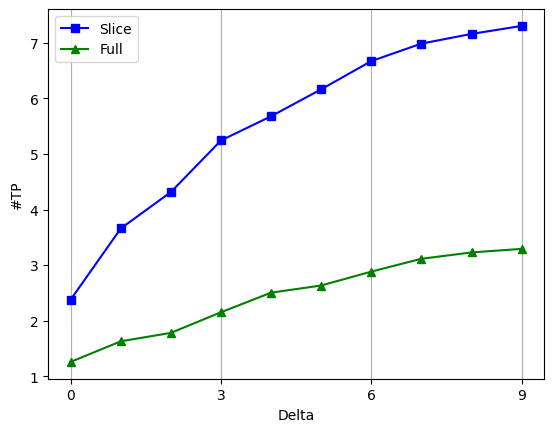

In [24]:
# FIGURE 4 SHOWING HOW TPs CHANGES WITH DELTA

tp_slice_delta0 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 0) & (df_all_vuln['Treat'] == 'slice')].sum()
tp_slice_delta1 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 1) & (df_all_vuln['Treat'] == 'slice')].sum()
tp_slice_delta2 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 2) & (df_all_vuln['Treat'] == 'slice')].sum()
tp_slice_delta3 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 3) & (df_all_vuln['Treat'] == 'slice')].sum()
tp_slice_delta4 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 4) & (df_all_vuln['Treat'] == 'slice')].sum()
tp_slice_delta5 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 5) & (df_all_vuln['Treat'] == 'slice')].sum()
tp_slice_delta6 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 6) & (df_all_vuln['Treat'] == 'slice')].sum()
tp_slice_delta7 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 7) & (df_all_vuln['Treat'] == 'slice')].sum()
tp_slice_delta8 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 8) & (df_all_vuln['Treat'] == 'slice')].sum()
tp_slice_delta9 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 9) & (df_all_vuln['Treat'] == 'slice')].sum()

tp_full_delta0 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 0) & (df_all_vuln['Treat'] == 'full')].sum()
tp_full_delta1 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 1) & (df_all_vuln['Treat'] == 'full')].sum()
tp_full_delta2 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 2) & (df_all_vuln['Treat'] == 'full')].sum()
tp_full_delta3 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 3) & (df_all_vuln['Treat'] == 'full')].sum()
tp_full_delta4 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 4) & (df_all_vuln['Treat'] == 'full')].sum()
tp_full_delta5 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 5) & (df_all_vuln['Treat'] == 'full')].sum()
tp_full_delta6 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 6) & (df_all_vuln['Treat'] == 'full')].sum()
tp_full_delta7 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 7) & (df_all_vuln['Treat'] == 'full')].sum()
tp_full_delta8 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 8) & (df_all_vuln['Treat'] == 'full')].sum()
tp_full_delta9 = df_all_vuln['TP'].loc[(df_all_vuln['Delta'] == 9) & (df_all_vuln['Treat'] == 'full')].sum()

x_slice = [tp_slice_delta0/len(finding_vuln_data), tp_slice_delta1/len(finding_vuln_data), tp_slice_delta2/len(finding_vuln_data),
           tp_slice_delta3/len(finding_vuln_data), tp_slice_delta4/len(finding_vuln_data), tp_slice_delta5/len(finding_vuln_data),
           tp_slice_delta6/len(finding_vuln_data), tp_slice_delta7/len(finding_vuln_data), tp_slice_delta8/len(finding_vuln_data),
           tp_slice_delta9/len(finding_vuln_data)]

x_full = [tp_full_delta0/len(finding_vuln_data), tp_full_delta1/len(finding_vuln_data), tp_full_delta2/len(finding_vuln_data),
          tp_full_delta3/len(finding_vuln_data), tp_full_delta4/len(finding_vuln_data), tp_full_delta5/len(finding_vuln_data),
          tp_full_delta6/len(finding_vuln_data), tp_full_delta7/len(finding_vuln_data), tp_full_delta8/len(finding_vuln_data),
          tp_full_delta9/len(finding_vuln_data)]
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.xlabel('Delta')
plt.ylabel('#TP')
plt.grid(axis='x')
plt.plot(y, x_slice, 'bs-', label = 'Slice')
plt.plot(y, x_full, 'g^-', label = 'Full')
plt.xticks(range(0,10,3))
plt.legend(loc = 'upper left')
plt.savefig('tp-across-all-vuln.png')
plt.show()

In [25]:
df_students_delta_six = pd.DataFrame()
df_students_delta_six['UniqueID'] = df_dos.loc[(df_dos['Neighborhood']==6)].UniqueID
df_students_delta_six['Path'] = df_path.loc[(df_path['Neighborhood']==6)].TP>0
df_students_delta_six['User'] = df_user.loc[(df_user['Neighborhood']==6)].TP>0
df_students_delta_six['XSS'] = df_xss.loc[(df_xss['Neighborhood']==6)].TP>0
df_students_delta_six['DoS'] = df_dos.loc[(df_dos['Neighborhood']==6)].TP>0

df_students_delta_six['sum'] = df_students_delta_six[['Path', 'User', 'XSS', 'DoS']].sum(1)

'''
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 0,
                       ):
  print(df_students)
'''

df_students_delta_six['sum'].value_counts()

sum
3    106
2     80
4     35
1     35
0      8
Name: count, dtype: int64

In [26]:
df_students_delta_nine = pd.DataFrame()
df_students_delta_nine['UniqueID'] = df_dos.loc[(df_dos['Neighborhood']==9)].UniqueID
df_students_delta_nine['Path'] = df_path.loc[(df_path['Neighborhood']==9)].TP>0
df_students_delta_nine['User'] = df_user.loc[(df_user['Neighborhood']==9)].TP>0
df_students_delta_nine['XSS'] = df_xss.loc[(df_xss['Neighborhood']==9)].TP>0
df_students_delta_nine['DoS'] = df_dos.loc[(df_dos['Neighborhood']==9)].TP>0

df_students_delta_nine['sum'] = df_students_delta_nine[['Path', 'User', 'XSS', 'DoS']].sum(1)

'''
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 0,
                       ):
  print(df_students)
'''

df_students_delta_nine['sum'].value_counts()

sum
3    112
2     75
4     37
1     33
0      7
Name: count, dtype: int64

In [27]:
zero_vuln_delta_zero = 0
one_vuln_delta_zero = 0
two_vuln_delta_zero = 0
three_vuln_delta_zero = 0
four_vuln_delta_zero = 0

for index, row in df_students_delta_zero.iterrows():
  if row['sum'] == 0:
    zero_vuln_delta_zero = zero_vuln_delta_zero + 1
  elif row['sum'] == 1:
    one_vuln_delta_zero = one_vuln_delta_zero + 1
  elif row['sum'] == 2:
    two_vuln_delta_zero = two_vuln_delta_zero + 1
  elif row['sum'] == 3:
    three_vuln_delta_zero = three_vuln_delta_zero + 1
  elif row['sum'] == 4:
    four_vuln_delta_zero = four_vuln_delta_zero + 1

In [28]:
zero_vuln_delta_three = 0
one_vuln_delta_three = 0
two_vuln_delta_three = 0
three_vuln_delta_three = 0
four_vuln_delta_three = 0

for index, row in df_students_delta_three.iterrows():
  if row['sum'] == 0:
    zero_vuln_delta_three = zero_vuln_delta_three + 1
  elif row['sum'] == 1:
    one_vuln_delta_three = one_vuln_delta_three + 1
  elif row['sum'] == 2:
    two_vuln_delta_three = two_vuln_delta_three + 1
  elif row['sum'] == 3:
    three_vuln_delta_three = three_vuln_delta_three + 1
  elif row['sum'] == 4:
    four_vuln_delta_three = four_vuln_delta_three + 1

In [29]:
zero_vuln_delta_six = 0
one_vuln_delta_six = 0
two_vuln_delta_six = 0
three_vuln_delta_six = 0
four_vuln_delta_six = 0

for index, row in df_students_delta_six.iterrows():
  if row['sum'] == 0:
    zero_vuln_delta_six = zero_vuln_delta_six + 1
  elif row['sum'] == 1:
    one_vuln_delta_six = one_vuln_delta_six + 1
  elif row['sum'] == 2:
    two_vuln_delta_six = two_vuln_delta_six + 1
  elif row['sum'] == 3:
    three_vuln_delta_six = three_vuln_delta_six + 1
  elif row['sum'] == 4:
    four_vuln_delta_six = four_vuln_delta_six + 1

In [30]:
zero_vuln_delta_nine = 0
one_vuln_delta_nine = 0
two_vuln_delta_nine = 0
three_vuln_delta_nine = 0
four_vuln_delta_nine = 0

for index, row in df_students_delta_nine.iterrows():
  if row['sum'] == 0:
    zero_vuln_delta_nine = zero_vuln_delta_nine + 1
  elif row['sum'] == 1:
    one_vuln_delta_nine = one_vuln_delta_nine + 1
  elif row['sum'] == 2:
    two_vuln_delta_nine = two_vuln_delta_nine + 1
  elif row['sum'] == 3:
    three_vuln_delta_nine = three_vuln_delta_nine + 1
  elif row['sum'] == 4:
    four_vuln_delta_nine = four_vuln_delta_nine + 1

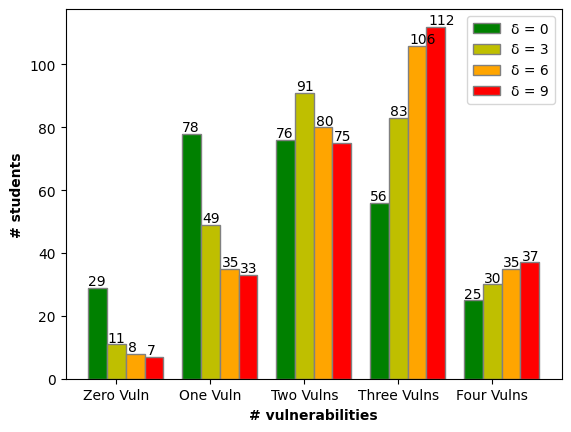

In [31]:
# set width of bar
barWidth = 0.2

# set height of bar
delta_zero = [zero_vuln_delta_zero, one_vuln_delta_zero, two_vuln_delta_zero, three_vuln_delta_zero, four_vuln_delta_zero]
delta_three = [zero_vuln_delta_three, one_vuln_delta_three, two_vuln_delta_three, three_vuln_delta_three, four_vuln_delta_three]
delta_six = [zero_vuln_delta_six, one_vuln_delta_six, two_vuln_delta_six, three_vuln_delta_six, four_vuln_delta_six]
delta_nine =[zero_vuln_delta_nine, one_vuln_delta_nine, two_vuln_delta_nine, three_vuln_delta_nine, four_vuln_delta_nine]

# Set position of bar on X axis
br1 = np.arange(len(delta_zero))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, delta_zero, color ='g', width = barWidth,
        edgecolor ='grey', label ='δ = 0')
plt.bar(br2, delta_three, color ='y', width = barWidth,
        edgecolor ='grey', label ='δ = 3')
plt.bar(br3, delta_six, color ='orange', width = barWidth,
        edgecolor ='grey', label ='δ = 6')
plt.bar(br4, delta_nine, color ='r', width = barWidth,
        edgecolor ='grey', label ='δ = 9')

# Adding Xticks
plt.xlabel('# vulnerabilities', fontweight ='bold', fontsize = 10)
plt.ylabel('# students', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(delta_zero))],
        ['Zero Vuln', 'One Vuln', 'Two Vulns', 'Three Vulns', 'Four Vulns'])

plt.legend()
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))

for i, v in enumerate(delta_zero):
    plt.text(br1[i] - 0.1, v + 0.8, str(v))

for i, v in enumerate(delta_three):
    plt.text(br2[i] - 0.09, v + 0.8, str(v))

for i, v in enumerate(delta_six):
    plt.text(br3[i] - 0.08, v + 0.8, str(v))

for i, v in enumerate(delta_nine):
    plt.text(br4[i] - 0.08, v + 0.8, str(v))

plt.savefig('vulnerabilities-found-each-delta.png')

plt.show()

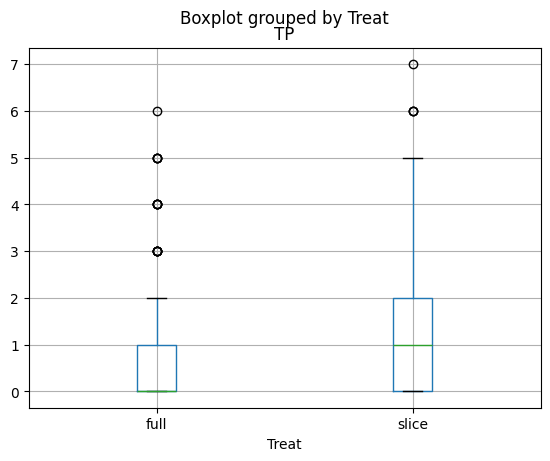

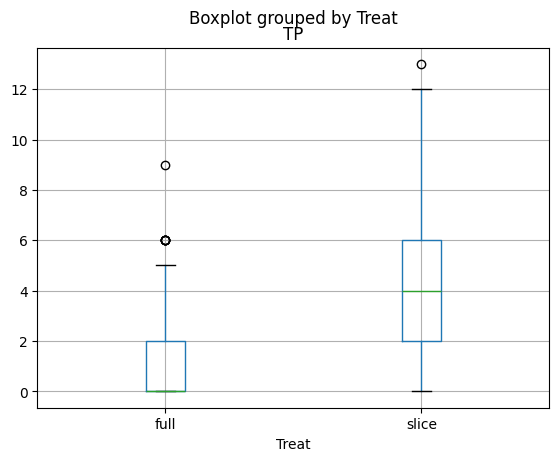

In [32]:
#Full vs Slice - Path

df_all_vuln.loc[(df_all_vuln['Vulnerability']=='path') & (df_all_vuln['Delta']==0) ].boxplot(column=['TP'], by="Treat")
plt.show()

df_all_vuln.loc[(df_all_vuln['Vulnerability']=='path') & (df_all_vuln['Delta']==3) ].boxplot(column=['TP'], by="Treat")
plt.show()

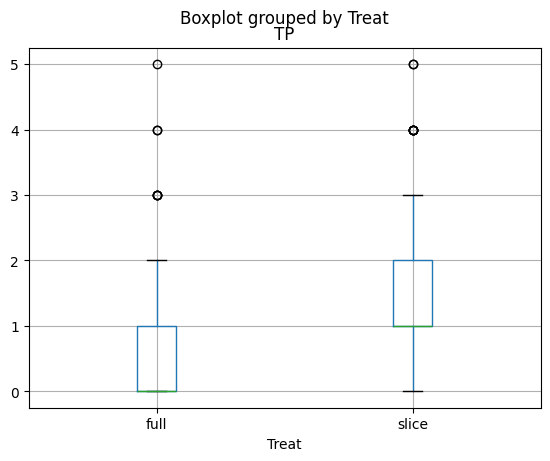

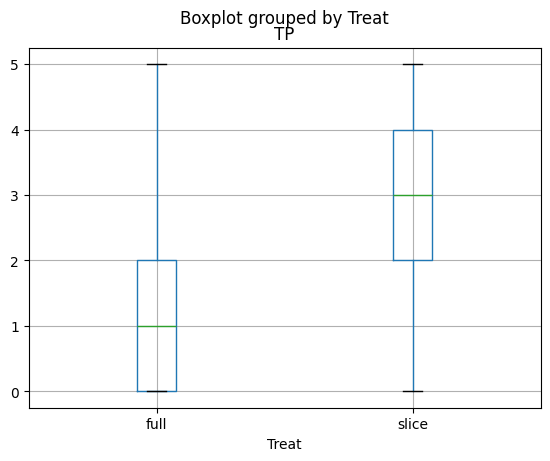

In [33]:
# FIGURE 5 SHOWING IN THE SAME FIGURE TWO SUBFIGURES ONE WITH DELTA=0 AND ONE WITH DELTA=3
#Full vs Slice - User

df_all_vuln.loc[(df_all_vuln['Vulnerability']=='user') & (df_all_vuln['Delta']==0) ].boxplot(column=['TP'], by="Treat")
plt.show()

df_all_vuln.loc[(df_all_vuln['Vulnerability']=='user') & (df_all_vuln['Delta']==3) ].boxplot(column=['TP'], by="Treat")
plt.show()

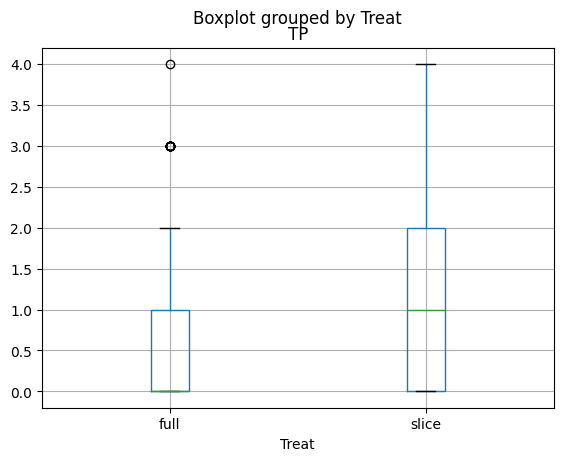

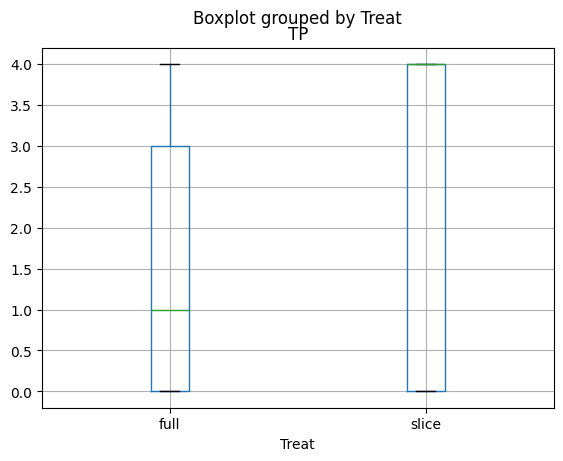

In [34]:
#Full vs Slice - XSS

df_all_vuln.loc[(df_all_vuln['Vulnerability']=='xss') & (df_all_vuln['Delta']==0) ].boxplot(column=['TP'], by="Treat")
plt.show()

df_all_vuln.loc[(df_all_vuln['Vulnerability']=='xss') & (df_all_vuln['Delta']==3) ].boxplot(column=['TP'], by="Treat")
plt.show()

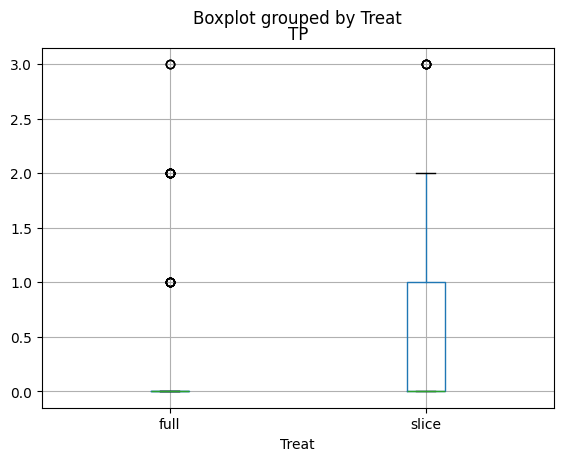

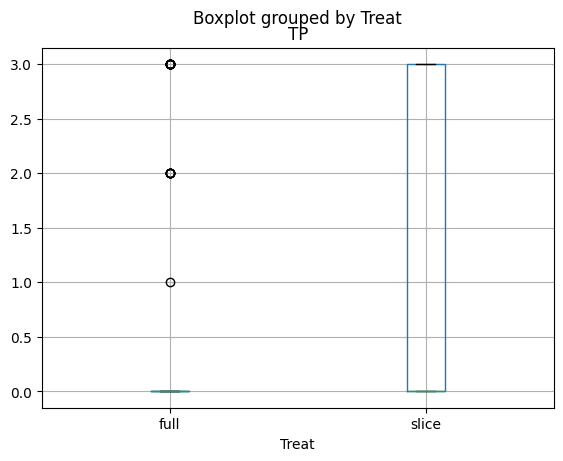

In [35]:
#Full vs Slice - DoS

df_all_vuln.loc[(df_all_vuln['Vulnerability']=='dos') & (df_all_vuln['Delta']==0) ].boxplot(column=['TP'], by="Treat")
plt.show()

df_all_vuln.loc[(df_all_vuln['Vulnerability']=='dos') & (df_all_vuln['Delta']==3) ].boxplot(column=['TP'], by="Treat")
plt.show()

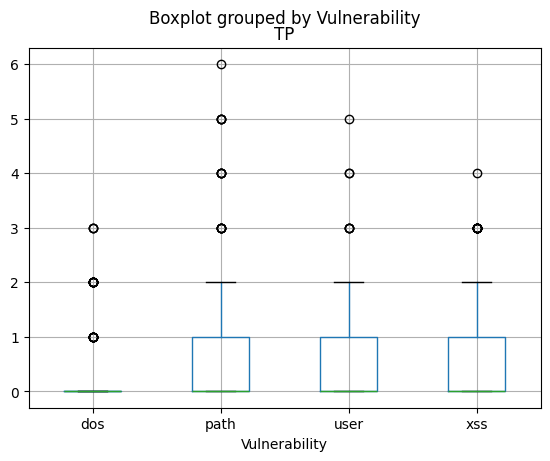

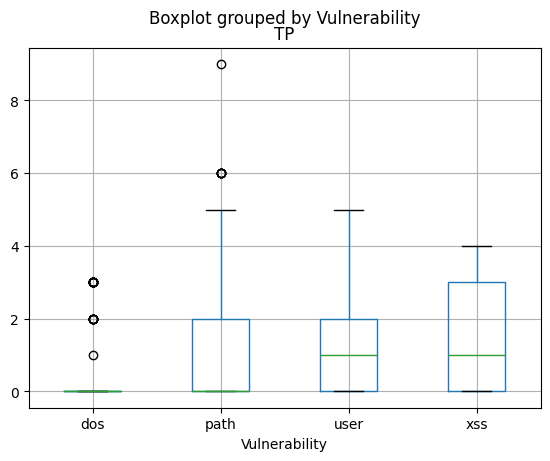

In [36]:
# FIGURE 6 ONLY THE ONLY THE SECOND BOXPLOT AS A LEFT SUBFIGURE ONE WITH DELTA=3
#Full vs Full

df_all_vuln.loc[(df_all_vuln['Treat']=='full') & (df_all_vuln['Delta']==0) ].boxplot(column=['TP'], by="Vulnerability")
plt.show()

df_all_vuln.loc[(df_all_vuln['Treat']=='full') & (df_all_vuln['Delta']==3) ].boxplot(column=['TP'], by="Vulnerability")
plt.show()

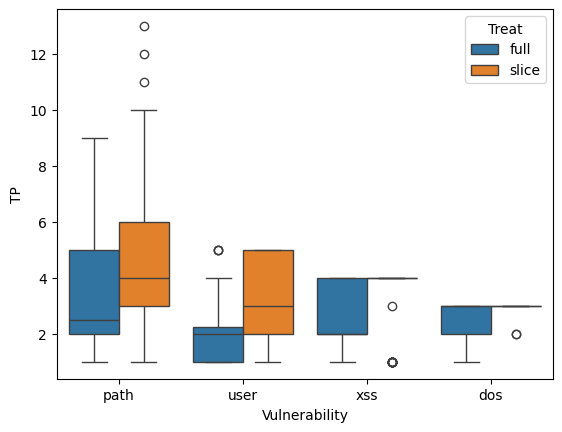

In [37]:
# FIGURE 6 ONLY THE SECOND BOXPLOT AS A RIGHT SUBFIGURE WITH DELTA=3
#Slice vs Slice

#df_all_vuln.loc[(df_all_vuln['Treat']=='full') & (df_all_vuln['Delta']==3) ].boxplot(column=['TP'], by="Vulnerability")
#plt.show()

#df_all_vuln.loc[(df_all_vuln['Treat']=='slice') & (df_all_vuln['Delta']==3) ].boxplot(column=['TP'], by="Vulnerability")
#plt.show()

sns.boxplot(x='Vulnerability', y='TP', hue='Treat', data = df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['TP'] > 0)])
plt.savefig('treat-boxplots.png')

In [38]:
vuln = ['path', 'user', 'xss', 'dos']
for v in vuln:
  print('TOT TP = 0 FULL', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] == 0)].TP.count())
  print('TOT TP > 0 FULL', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP.count())
  print('TOT TP = 0 SLICE', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] == 0)].TP.count())
  print('TOT TP > 0 SLICE', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP.count())

TOT TP = 0 FULL path : 82
TOT TP > 0 FULL path : 50
TOT TP = 0 SLICE path : 12
TOT TP > 0 SLICE path : 120
TOT TP = 0 FULL user : 61
TOT TP > 0 FULL user : 72
TOT TP = 0 SLICE user : 12
TOT TP > 0 SLICE user : 119
TOT TP = 0 FULL xss : 62
TOT TP > 0 FULL xss : 71
TOT TP = 0 SLICE xss : 44
TOT TP > 0 SLICE xss : 87
TOT TP = 0 FULL dos : 102
TOT TP > 0 FULL dos : 28
TOT TP = 0 SLICE dos : 81
TOT TP > 0 SLICE dos : 53


In [39]:
vuln = ['path', 'user', 'xss', 'dos']
for v in vuln:
  print('mean full', v, ':',np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP))
  print('std full', v, ':',np.std(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP))
  print('mean slice', v, ':', np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP))
  print('std slice', v, ':',np.std(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP))


mean full path : 3.2
std full path : 1.8973665961010275
mean slice path : 4.616666666666666
std slice path : 2.553374673294584
mean full user : 2.0
std full user : 0.9860132971832694
mean slice user : 3.142857142857143
std slice user : 1.2852473475163126
mean full xss : 2.6619718309859155
std full xss : 1.0473798559198986
mean slice xss : 3.4367816091954024
std slice xss : 1.161659033850358
mean full dos : 2.6785714285714284
std full dos : 0.5380899704756915
mean slice dos : 2.9622641509433962
std slice dos : 0.19055669695022787


In [40]:
vuln = ['path', 'user', 'xss', 'dos']
for v in vuln:
  print('mean full', v, ':', np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FP))
  print('std full', v, ':', np.std(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FP))
  print('mean slice', v, ':',np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FP))
  print('std slice', v, ':',np.std(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FP))

mean full path : 2.28
std full path : 3.4178355724054374
mean slice path : 0.2833333333333333
std slice path : 0.5654398484562461
mean full user : 1.375
std full user : 1.9680609464365906
mean slice user : 0.4117647058823529
std slice user : 0.5998846486579749
mean full xss : 1.9154929577464788
std full xss : 4.027183963079615
mean slice xss : 1.4942528735632183
std slice xss : 1.5600881438286518
mean full dos : 1.7142857142857142
std full dos : 2.249716535431946
mean slice dos : 1.4150943396226414
std slice dos : 1.5952046330451517


In [41]:
vuln = ['path', 'user', 'xss', 'dos']
for v in vuln:
  print('mean full', v, ':', np.mean((df_all_vuln['Delta']==3) & df_all_vuln.loc[(df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FN))
  print('std full', v, ':', np.std((df_all_vuln['Delta']==3) & df_all_vuln.loc[(df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FN))
  print('mean slice', v, ':',np.mean((df_all_vuln['Delta']==3) & df_all_vuln.loc[(df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FN))
  print('std slice', v, ':',np.std((df_all_vuln['Delta']==3) & df_all_vuln.loc[(df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FN))

mean full path : 0.002462121212121212
std full path : 0.049558643759268016
mean slice path : 0.005303030303030303
std slice path : 0.0726285630632704
mean full user : 0.002840909090909091
std full user : 0.053224414759077264
mean slice user : 0.0029356060606060604
std slice user : 0.05410164764277511
mean full xss : 0.0019886363636363634
std full xss : 0.04454976643092068
mean slice xss : 0.0016098484848484848
std slice xss : 0.04009060828553636
mean full dos : 0.0006628787878787879
std full dos : 0.02573789773061056
mean slice dos : 0.0001893939393939394
std slice dos : 0.013760743778214178


<ipython-input-41-ae2ca27b065c>:3: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  print('mean full', v, ':', np.mean((df_all_vuln['Delta']==3) & df_all_vuln.loc[(df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FN))
<ipython-input-41-ae2ca27b065c>:4: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  print('std full', v, ':', np.std((df_all_vuln['Delta']==3) & df_all_vuln.loc[(df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].FN))
<ipython-input-41-ae2ca27b065c>:5: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast

In [42]:
#df_all_vuln.groupby('TP').count()
print(df_all_vuln.loc[(df_all_vuln['Delta']==3)].TP.value_counts())
print(df_all_vuln.loc[(df_all_vuln['Delta']==3)].TP.sum())

TP
0     456
3     176
2     125
4     116
1      79
5      61
6      20
9       6
8       6
10      4
7       4
12      1
13      1
11      1
Name: count, dtype: int64
1952


In [43]:
pd.set_option('display.max_rows', None)
print(df_all_vuln.loc[(df_all_vuln['Delta']==3)].groupby(["Treat", "TP", "Vulnerability"]).size())

Treat  TP  Vulnerability
full   0   dos              102
           path              82
           user              61
           xss               62
       1   dos                1
           path              10
           user              25
           xss                9
       2   dos                7
           path              15
           user              29
           xss               28
       3   dos               20
           path               5
           user              14
           xss               12
       4   path               5
           user               1
           xss               22
       5   path               8
           user               3
       6   path               6
       9   path               1
slice  0   dos               81
           path              12
           user              12
           xss               44
       1   path               7
           user              11
           xss               16
       2   dos 

In [44]:
contingency = stats.chi2_contingency(np.array([[1160,728],[533,1355]]))
print(contingency)

Chi2ContingencyResult(statistic=419.59898018414196, pvalue=2.9835482736702545e-93, dof=1, expected_freq=array([[ 846.5, 1041.5],
       [ 846.5, 1041.5]]))


In [45]:
kruskal = stats.kruskal(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP, df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP)
print(kruskal)

KruskalResult(statistic=67.16496180256335, pvalue=2.4971297350435135e-16)


In [46]:
X_square = contingency.statistic + kruskal.statistic
print(X_square)

486.76394198670533


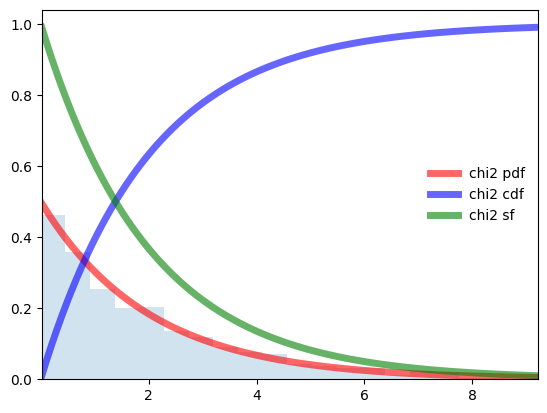

p-value: 1.9978045727701886e-106


In [47]:
fig, ax = plt.subplots(1, 1)
df = 2
rv = stats.chi2(df)
x = np.linspace(rv.ppf(0.01),rv.ppf(0.99),100)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
#x = np.linspace(0.020,9.210,100)
ax.plot(x, rv.cdf(x), 'b-', lw=5, alpha=0.6, label = 'chi2 cdf')
ax.plot(x, rv.sf(x), 'g-', lw=5, alpha=0.6, label = 'chi2 sf')
r = stats.chi2.rvs(df, size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

p_value = rv.sf(X_square)
print('p-value:', p_value)

In [48]:
contingency_original = stats.chi2_contingency(np.array([[289,270,245,356],[183,214,227,104]]))
print(contingency_original)

Chi2ContingencyResult(statistic=74.05265506743494, pvalue=5.782703093201028e-16, dof=3, expected_freq=array([[290.        , 297.37288136, 290.        , 282.62711864],
       [182.        , 186.62711864, 182.        , 177.37288136]]))


In [49]:
kruskal_original = stats.kruskal(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']=='path') & (df_all_vuln['TP'] > 0)].TP,
                         df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']=='user') & (df_all_vuln['TP'] > 0)].TP,
                         df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']=='xss') & (df_all_vuln['TP'] > 0)].TP,
                         df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']=='dos') & (df_all_vuln['TP'] > 0)].TP)

print(kruskal_original)

KruskalResult(statistic=23.03442977049978, pvalue=3.972118244832386e-05)


In [50]:
X_square_original = contingency_original.statistic + kruskal_original.statistic
print(X_square_original)

97.08708483793473


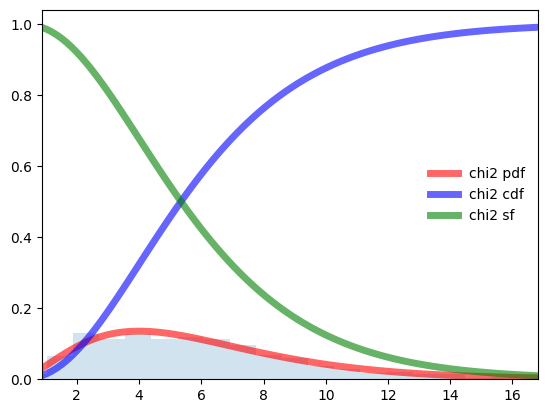

p-value: 1.0160811839678221e-18


In [51]:
fig, ax = plt.subplots(1, 1)
df = 6
rv = stats.chi2(df)
x = np.linspace(rv.ppf(0.01),rv.ppf(0.99),100)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
#x = np.linspace(0.020,9.210,100)
ax.plot(x, rv.cdf(x), 'b-', lw=5, alpha=0.6, label = 'chi2 cdf')
ax.plot(x, rv.sf(x), 'g-', lw=5, alpha=0.6, label = 'chi2 sf')
r = stats.chi2.rvs(df, size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

p_value = rv.sf(X_square_original)
print('p-value:', p_value)

In [52]:
contingency_slice = stats.chi2_contingency(np.array([[55,59,161,258],[417,401,311,226]]))
print(contingency_slice)

Chi2ContingencyResult(statistic=276.15372972618036, pvalue=1.4389948178557415e-59, dof=3, expected_freq=array([[133.25      , 129.86228814, 133.25      , 136.63771186],
       [338.75      , 330.13771186, 338.75      , 347.36228814]]))


In [53]:
kruskal_slice = stats.kruskal(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']=='path') & (df_all_vuln['TP'] > 0)].TP,
                         df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']=='user') & (df_all_vuln['TP'] > 0)].TP,
                         df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']=='xss') & (df_all_vuln['TP'] > 0)].TP,
                         df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']=='dos') & (df_all_vuln['TP'] > 0)].TP)

print(kruskal_slice)

KruskalResult(statistic=38.59564480803292, pvalue=2.1140533148999895e-08)


In [54]:
X_square_slice = contingency_slice.statistic + kruskal_slice.statistic

In [55]:
found_nothing_full = df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] == 0)].TP.count()
found_something_full = df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP.count()
found_nothing_slice = df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] == 0)].TP.count()
found_something_slice = df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP.count()

print([found_nothing_full, found_nothing_slice], [found_something_full,  found_something_slice])

[307, 149] [221, 379]


In [56]:
print(stats.chi2_contingency([[found_nothing_full, found_nothing_slice],
                             [found_something_full, found_something_slice]]))

Chi2ContingencyResult(statistic=95.13649122807016, pvalue=1.7770069044180401e-22, dof=1, expected_freq=array([[228., 228.],
       [300., 300.]]))


In [57]:
found_nothing_full_arr = []
found_something_full_arr = []
found_nothing_slice_arr = []
found_something_slice_arr = []

for v in vuln:
  found_nothing_full_arr.append(df_all_vuln.loc[(df_all_vuln['Delta'] == 3) & (df_all_vuln['Treat'] == 'full') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] == 0)].TP.count())
  found_something_full_arr.append(df_all_vuln.loc[(df_all_vuln['Delta'] == 3) & (df_all_vuln['Treat'] == 'full') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP.count())
  found_nothing_slice_arr.append(df_all_vuln.loc[(df_all_vuln['Delta'] == 3) & (df_all_vuln['Treat'] == 'slice') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] == 0)].TP.count())
  found_something_slice_arr.append(df_all_vuln.loc[(df_all_vuln['Delta'] == 3) & (df_all_vuln['Treat'] == 'slice') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP.count())


print([found_nothing_full_arr, found_something_full_arr])
print([found_nothing_slice_arr, found_something_slice_arr])

print(stats.chi2_contingency([found_nothing_full_arr, found_something_full_arr]))
print(stats.chi2_contingency([found_nothing_slice_arr, found_something_slice_arr]))

[[82, 61, 62, 102], [50, 72, 71, 28]]
[[12, 12, 44, 81], [120, 119, 87, 53]]
Chi2ContingencyResult(statistic=38.41089575690507, pvalue=2.3133538468471975e-08, dof=3, expected_freq=array([[76.75      , 77.33143939, 77.33143939, 75.58712121],
       [55.25      , 55.66856061, 55.66856061, 54.41287879]]))
Chi2ContingencyResult(statistic=117.91021334387254, pvalue=2.175082728656791e-25, dof=3, expected_freq=array([[37.25      , 36.96780303, 36.96780303, 37.81439394],
       [94.75      , 94.03219697, 94.03219697, 96.18560606]]))


In [58]:
print("Full Normality Test: ", stats.normaltest(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP))
print("Slice Normality Test: ", stats.normaltest(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP))

Full Normality Test:  NormaltestResult(statistic=48.44762360303217, pvalue=3.018090122063151e-11)
Slice Normality Test:  NormaltestResult(statistic=133.15238492342704, pvalue=1.2199077426582053e-29)


In [59]:
#TOST slice vs full for TP > 0

# Magnitude of region of similarity
bound_less = 0.8
bound_greater = 1.25

# Paired two-sample t-test
u_less, p_less = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP * bound_less,
                               df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP, alternative="less")

u_greater, p_greater = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP,
                                  df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP * bound_greater, alternative="less")

#kruskal = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP, df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP, alternative = "less")
#print(kruskal)

# Choose the maximum p-value
print(u_less, p_less, u_greater, p_greater)
pval = max(p_less, p_greater)

print(f'TOST: p = {pval:5.10f}')

50080.0 0.999973430887095 17364.0 6.76690652440576e-34
TOST: p = 0.9999734309


In [60]:
fullY, fullX = np.histogram(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP, bins=[1,2,3,4,5,6,7,8,9,10,11], density=True)
sliceY, sliceX = np.histogram(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP, bins=[1,2,3,4,5,6,7,8,9,10,11], density=True)
sliceY_less_bound, sliceX_less_bound = np.histogram(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP*0.8, bins=[1,2,3,4,5,6,7,8,9,10,11], density=True)
sliceY_great_bound, sliceX_great_bound = np.histogram(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP*1.25, bins=[1,2,3,4,5,6,7,8,9,10,11], density=True)

fullY_len = len(fullY)
sliceY_len = len(sliceY)
sliceY_less_bound_len = len(sliceY_less_bound)+1
sliceY_great_bound_len = len(sliceY_great_bound)+1

plt.plot(fullX[0:fullY_len],fullY, color="red", label="full")
plt.plot(sliceX[0:sliceY_len],sliceY, color="green", label="slice")
#plt.plot(sliceX_less_bound[1:sliceY_less_bound_len],sliceY_less_bound, color="orange", label="slice*0.8")
#plt.plot(sliceX_great_bound[1:sliceY_great_bound_len],sliceY_great_bound, color="blue", label="slice*1.25")

plt.legend()


In [61]:
#TOST slice vs full for TP > 0

# Magnitude of region of similarity
bound_less = 0.8
bound_greater = 1.25

for v in vuln:
  # Paired two-sample t-test
  u_less, p_less = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP * bound_less,
                                      df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP, alternative="less")

  u_greater, p_greater = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP,
                                            df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP * bound_greater, alternative="less")

  # Choose the maximum p-value
  print(v, u_less, p_less, u_greater, p_greater)
  pval = max(p_less, p_greater)

  print(f'TOST: p = {pval:5.10f}')

path 3428.5 0.9298452379760311 1436.0 3.836347319838837e-08
TOST: p = 0.9298452380
user 5554.5 0.9997507230360679 1193.0 1.2938204403811256e-17
TOST: p = 0.9997507230
xss 3467.0 0.9183412165157105 1014.0 1.1886040725746934e-14
TOST: p = 0.9183412165
dos 410.0 6.143424324315646e-05 40.0 2.2061590959856286e-16
TOST: p = 0.0000614342


In [62]:
for v in vuln:
  res = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP,
                           df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP,
                           alternative="greater")
  print(v + ": ", res)

path:  MannwhitneyuResult(statistic=4002.5, pvalue=0.0002659814408628142)
user:  MannwhitneyuResult(statistic=6469.5, pvalue=4.840087572676696e-10)
xss:  MannwhitneyuResult(statistic=4315.0, pvalue=7.404945560074654e-07)
dos:  MannwhitneyuResult(statistic=927.0, pvalue=0.0006572053311625796)


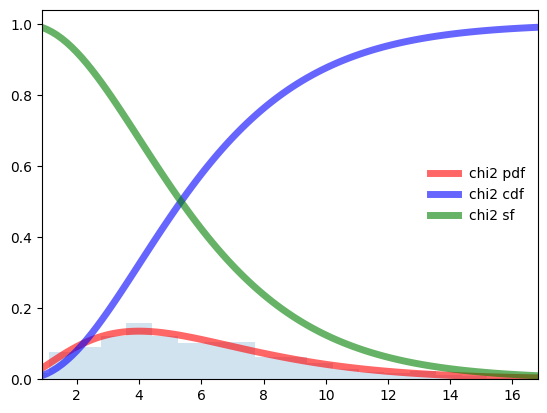

p-value: 5.6415778810566325e-65


In [63]:
fig, ax = plt.subplots(1, 1)
df = 6
rv = stats.chi2(df)
x = np.linspace(rv.ppf(0.01),rv.ppf(0.99),100)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
#x = np.linspace(0.020,9.210,100)
ax.plot(x, rv.cdf(x), 'b-', lw=5, alpha=0.6, label = 'chi2 cdf')
ax.plot(x, rv.sf(x), 'g-', lw=5, alpha=0.6, label = 'chi2 sf')
r = stats.chi2.rvs(df, size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

p_value = rv.sf(X_square_slice)
print('p-value:', p_value)

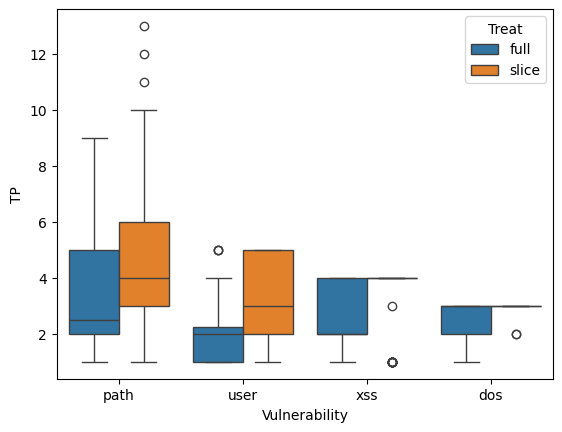

In [64]:
sns.boxplot(x='Vulnerability', y='TP', hue='Treat', data = df_all_vuln.loc[(df_all_vuln['Delta']==3) & (df_all_vuln['TP'] > 0)])
plt.savefig('treat-boxplots.png')

In [65]:
no_experience_full_java = 0
no_experience_slice_java = 0
no_experience_full_vuln = 0
no_experience_slice_vuln = 0

few_experience_full_java = 0
few_experience_slice_java = 0
few_experience_full_vuln = 0
few_experience_slice_vuln = 0

some_experience_full_java = 0
some_experience_slice_java = 0
some_experience_full_vuln = 0
some_experience_slice_vuln = 0

lot_experience_full_java = 0
lot_experience_slice_java = 0
lot_experience_full_vuln = 0
lot_experience_slice_vuln = 0

In [66]:
dict_java = {"No experience": 1 , "I have attended a couple of lectures on programming in Java in a course or on some web site": 1,
             "As part of University projects": 2, "I have attended a course/tutorial on programming in Java": 2,
             "Developed project(s) using Java outside university": 3, "I have written several programs in Java in hands-on labs or during short internships": 3,
             "Developed several projects using Java": 4, "Several years of professional experience with Java": 4,
             "I have developed some significant projects in Java during my professional experiences (>3 months)": 4}

dict_vuln = {"No experience": 1, "I have attended a couple of lectures on hacking and security in a course or on some web site": 1,
             "As part of University projects": 2, "I have attended a course/tutorial on buffer overflow or software testing": 2,
             "Find vulnerabilities outside university": 3, "I have used a fuzzer or vulnerability scanner in hands-on labs or during short internships": 3,
             "Find vulnerabilities for several projects": 4, "Several years of professional experience outside of university": 4,
             "I have used vulnerability & network scanners during my professional experiences (>3 months)": 4}

finding_vuln_training['Knowledge Java'] = finding_vuln_training['Knowledge Java'].map(dict_java)
finding_vuln_training['Knowledge Finding Vulnerabilities'] = finding_vuln_training['Knowledge Finding Vulnerabilities'].map(dict_vuln)

In [67]:
merged_df_students_delta_three = pd.merge(finding_vuln_training, df_students_delta_three, on="UniqueID")

In [68]:
count_students_full = 0
count_students_slice = 0

for index, row in merged_df_students_delta_three.iterrows():
  if row["Path"]:
    if row["Group"] == 1 or row["Group"] == 4 or row["Group"] == 5:
      if row["Knowledge Java"] == 1:
        no_experience_full_java += 1

      elif row["Knowledge Finding Vulnerabilities"] == 1:
          no_experience_full_vuln += 1

      elif row["Knowledge Java"] == 2:
          few_experience_full_java += 1

      elif row["Knowledge Finding Vulnerabilities"] == 2:
          few_experience_full_vuln += 1

      elif row["Knowledge Java"] == 3:
          some_experience_full_java += 1

      elif row["Knowledge Finding Vulnerabilities"] == 3:
          some_experience_full_vuln += 1

      elif row["Knowledge Java"] == 4:
          lot_experience_full_java += 1

      elif row["Knowledge Finding Vulnerabilities"] == 4:
          lot_experience_full_vuln += 1

    elif row["Group"] == 2 or row["Group"] == 3 or row["Group"] == 6:
      if row["Knowledge Java"] == 1:
        no_experience_slice_java += 1

      elif row["Knowledge Finding Vulnerabilities"] == 1:
          no_experience_slice_vuln += 1

      elif row["Knowledge Java"] == 2:
          few_experience_slice_java += 1

      elif row["Knowledge Finding Vulnerabilities"] == 2:
          few_experience_slice_vuln += 1

      elif row["Knowledge Java"] == 3:
          some_experience_slice_java += 1

      elif row["Knowledge Finding Vulnerabilities"] == 3:
          some_experience_slice_vuln += 1

      elif row["Knowledge Java"] == 4:
          lot_experience_slice_java += 1

      elif row["Knowledge Finding Vulnerabilities"] == 4:
          lot_experience_slice_vuln += 1

count_students_full_java = no_experience_full_java + few_experience_full_java + some_experience_full_java + lot_experience_full_java
count_students_slice_java = no_experience_slice_java + few_experience_slice_java + some_experience_slice_java + lot_experience_slice_java
count_students_full_vuln = no_experience_full_vuln + few_experience_full_vuln + some_experience_full_vuln + lot_experience_full_vuln
count_students_slice_vuln = no_experience_slice_vuln + few_experience_slice_vuln + some_experience_slice_vuln + lot_experience_slice_vuln

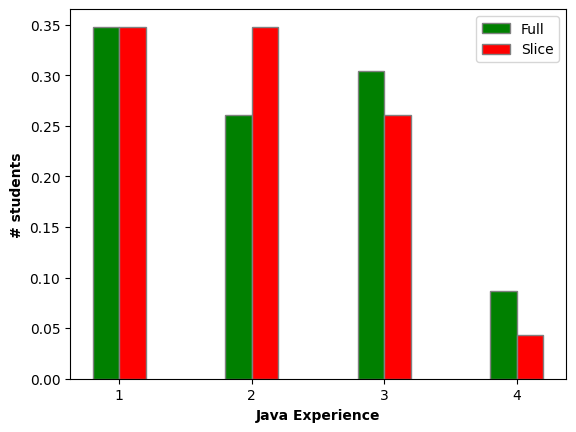

In [69]:
# set width of bar
barWidth = 0.2

# set height of bar
full_java = [no_experience_full_java/count_students_full_java, few_experience_full_java/count_students_full_java, some_experience_full_java/count_students_full_java, lot_experience_full_java/count_students_full_java]
slice_java = [no_experience_slice_java/count_students_slice_java, few_experience_slice_java/count_students_slice_java, some_experience_slice_java/count_students_slice_java, lot_experience_slice_java/count_students_slice_java]

# Set position of bar on X axis
br1 = np.arange(len(full_java))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, full_java, color ='g', width = barWidth,
        edgecolor ='grey', label ='Full')
plt.bar(br2, slice_java, color ='r', width = barWidth,
        edgecolor ='grey', label ='Slice')

# Adding Xticks
plt.xlabel('Java Experience', fontweight ='bold', fontsize = 10)
plt.ylabel('# students', fontweight ='bold', fontsize = 10)

plt.xticks([r + barWidth/2 for r in range(len(full_java))],
           [1, 2, 3, 4])

plt.legend()
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))


plt.show()

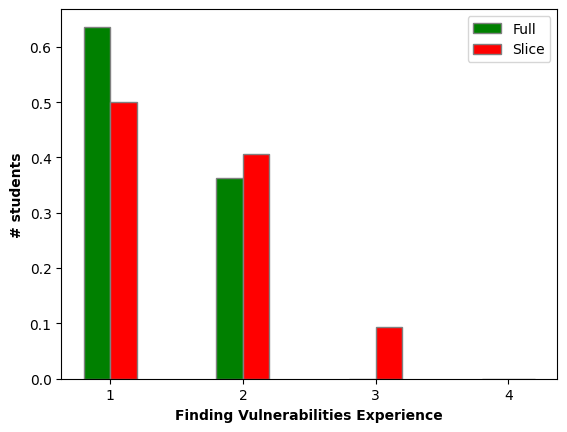

In [70]:
# set width of bar
barWidth = 0.2

# set height of bar
full_vuln = [no_experience_full_vuln/count_students_full_vuln, few_experience_full_vuln/count_students_full_vuln, some_experience_full_vuln/count_students_full_vuln, lot_experience_full_vuln/count_students_full_vuln]
slice_vuln = [no_experience_slice_vuln/count_students_slice_vuln, few_experience_slice_vuln/count_students_slice_vuln, some_experience_slice_vuln/count_students_slice_vuln, lot_experience_slice_vuln/count_students_slice_vuln]

# Set position of bar on X axis
br1 = np.arange(len(full_vuln))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, full_vuln, color ='g', width = barWidth,
        edgecolor ='grey', label ='Full')
plt.bar(br2, slice_vuln, color ='r', width = barWidth,
        edgecolor ='grey', label ='Slice')

# Adding Xticks
plt.xlabel('Finding Vulnerabilities Experience', fontweight ='bold', fontsize = 10)
plt.ylabel('# students', fontweight ='bold', fontsize = 10)

plt.xticks([r + barWidth/2 for r in range(len(full_vuln))],
           [1, 2, 3, 4])

plt.legend()
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))


plt.show()

In [71]:
stats.chi2_contingency([[no_experience_full_java, few_experience_full_java, some_experience_full_java, lot_experience_full_java],
                       [no_experience_slice_java, few_experience_slice_java, some_experience_slice_java, lot_experience_slice_java]])

Chi2ContingencyResult(statistic=0.9688995215311005, pvalue=0.8087767460700837, dof=3, expected_freq=array([[ 8.        ,  7.33333333,  6.33333333,  1.33333333],
       [16.        , 14.66666667, 12.66666667,  2.66666667]]))

In [72]:
df_students = pd.DataFrame()
df_students['UniqueID'] = df_dos.loc[(df_dos['Neighborhood']==3)].UniqueID
df_students['Path'] = df_path.loc[(df_path['Neighborhood']==3)].TP
df_students['User'] = df_user.loc[(df_user['Neighborhood']==3)].TP
df_students['XSS'] = df_xss.loc[(df_xss['Neighborhood']==3)].TP
df_students['DoS'] = df_dos.loc[(df_dos['Neighborhood']==3)].TP

merged_df_students = pd.merge(finding_vuln_training, df_students, on="UniqueID")

array([[<Axes: title={'center': 'Path'}, xlabel='Knowledge Java'>,
        <Axes: title={'center': 'User'}, xlabel='Knowledge Java'>],
       [<Axes: title={'center': 'XSS'}, xlabel='Knowledge Java'>,
        <Axes: title={'center': 'DoS'}, xlabel='Knowledge Java'>]],
      dtype=object)

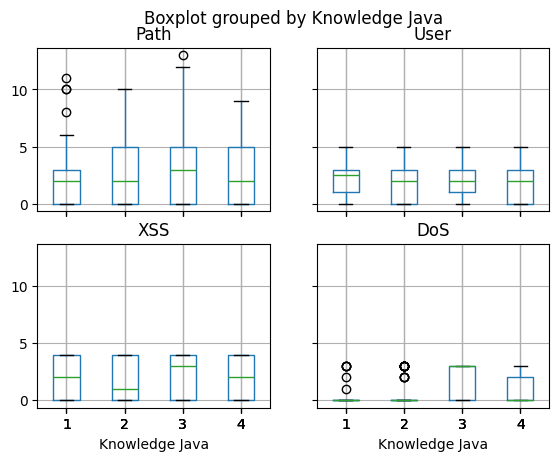

In [73]:
merged_df_students.boxplot(column=['Path', 'User', 'XSS', 'DoS'], by="Knowledge Java")

array([[<Axes: title={'center': 'Path'}, xlabel='Knowledge Finding Vulnerabilities'>,
        <Axes: title={'center': 'User'}, xlabel='Knowledge Finding Vulnerabilities'>],
       [<Axes: title={'center': 'XSS'}, xlabel='Knowledge Finding Vulnerabilities'>,
        <Axes: title={'center': 'DoS'}, xlabel='Knowledge Finding Vulnerabilities'>]],
      dtype=object)

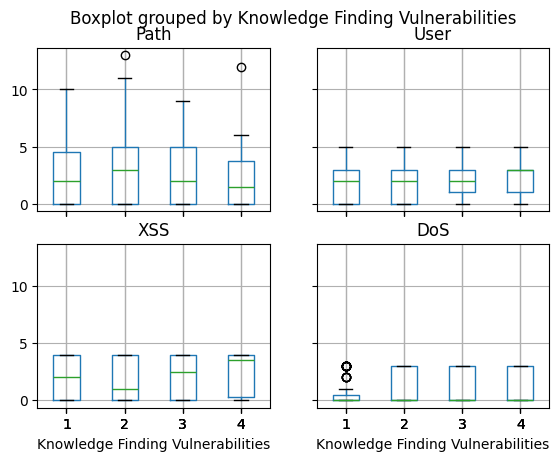

In [74]:
merged_df_students.boxplot(column=['Path', 'User', 'XSS', 'DoS'], by="Knowledge Finding Vulnerabilities")

In [75]:
first_full = []
second_full = []
first_slice = []
second_slice = []

for index, row in df_all_vuln.iterrows():
  group = row['UniqueID'].split('-')[0]

  if group == "Group1":
    if row["Treat"] == "full" and row["Vulnerability"]  == "path" and row["Delta"] == 3:
      first_full.append(row["TP"])
    elif row["Treat"] == "full" and row["Vulnerability"] == "xss" and row["Delta"] == 3:
      second_full.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "user" and row["Delta"] == 3:
      first_slice.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "dos" and row["Delta"] == 3:
      second_slice.append(row["TP"])

  if group == "Group2":
    if row["Treat"] == "full" and row["Vulnerability"] == "user" and row["Delta"] == 3:
      first_full.append(row["TP"])
    elif row["Treat"] == "full" and row["Vulnerability"] == "dos" and row["Delta"] == 3:
      second_full.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "path" and row["Delta"] == 3:
      first_slice.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "xss" and row["Delta"] == 3:
      second_slice.append(row["TP"])

  if group == "Group3":
    if row["Treat"] == "full" and row["Vulnerability"] == "xss" and row["Delta"] == 3:
      first_full.append(row["TP"])
    elif row["Treat"] == "full" and row["Vulnerability"] == "dos" and row["Delta"] == 3:
      second_full.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "path" and row["Delta"] == 3:
      first_slice.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "user" and row["Delta"] == 3:
      second_slice.append(row["TP"])

  if group == "Group4":
    if row["Treat"] == "full" and row["Vulnerability"] == "path" and row["Delta"] == 3:
      first_full.append(row["TP"])
    elif row["Treat"] == "full" and row["Vulnerability"] == "user" and row["Delta"] == 3:
      second_full.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "xss" and row["Delta"] == 3:
      first_slice.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "dos" and row["Delta"] == 3:
      second_slice.append(row["TP"])

  if group == "Group5":
    if row["Treat"] == "full" and row["Vulnerability"] == "path" and row["Delta"] == 3:
      first_full.append(row["TP"])
    elif row["Treat"] == "full" and row["Vulnerability"] == "dos" and row["Delta"] == 3:
      second_full.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "user" and row["Delta"] == 3:
      first_slice.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "xss" and row["Delta"] == 3:
      second_slice.append(row["TP"])

  if group == "Group6":
    if row["Treat"] == "full" and row["Vulnerability"] == "user" and row["Delta"] == 3:
      first_full.append(row["TP"])
    elif row["Treat"] == "full" and row["Vulnerability"] == "xss" and row["Delta"] == 3:
      second_full.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "path" and row["Delta"] == 3:
      first_slice.append(row["TP"])
    elif row["Treat"] == "slice" and row["Vulnerability"] == "dos" and row["Delta"] == 3:
      second_slice.append(row["TP"])


In [76]:
stats.ttest_ind(first_full, second_full, alternative = "less")

TtestResult(statistic=0.8547280650508594, pvalue=0.8034545838045333, df=526.0)

In [77]:
stats.ttest_ind(first_slice, second_slice, alternative = "less")

TtestResult(statistic=8.719196579326416, pvalue=1.0, df=526.0)

### Analysis with delta = 0

In [78]:
vuln = ['path', 'user', 'xss', 'dos']
for v in vuln:
  print('TOT TP = 0 FULL', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] == 0)].TP.count())
  print('TOT TP > 0 FULL', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP.count())
  print('TOT TP = 0 SLICE', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] == 0)].TP.count())
  print('TOT TP > 0 SLICE', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP.count())

TOT TP = 0 FULL path : 85
TOT TP > 0 FULL path : 47
TOT TP = 0 SLICE path : 36
TOT TP > 0 SLICE path : 96
TOT TP = 0 FULL user : 70
TOT TP > 0 FULL user : 63
TOT TP = 0 SLICE user : 29
TOT TP > 0 SLICE user : 102
TOT TP = 0 FULL xss : 89
TOT TP > 0 FULL xss : 44
TOT TP = 0 SLICE xss : 61
TOT TP > 0 SLICE xss : 70
TOT TP = 0 FULL dos : 105
TOT TP > 0 FULL dos : 25
TOT TP = 0 SLICE dos : 83
TOT TP > 0 SLICE dos : 51


In [79]:
vuln = ['path', 'user', 'xss', 'dos']
for v in vuln:
  print('TOT FP = 0 FULL', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FP'] == 0)].FP.count())
  print('TOT FP > 0 FULL', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FP'] > 0)].FP.count())
  print('TOT FP = 0 SLICE', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FP'] == 0)].FP.count())
  print('TOT FP > 0 SLICE', v, ':', df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FP'] > 0)].FP.count())

TOT FP = 0 FULL path : 10
TOT FP > 0 FULL path : 122
TOT FP = 0 SLICE path : 34
TOT FP > 0 SLICE path : 98
TOT FP = 0 FULL user : 6
TOT FP > 0 FULL user : 127
TOT FP = 0 SLICE user : 41
TOT FP > 0 SLICE user : 90
TOT FP = 0 FULL xss : 11
TOT FP > 0 FULL xss : 122
TOT FP = 0 SLICE xss : 22
TOT FP > 0 SLICE xss : 109
TOT FP = 0 FULL dos : 6
TOT FP > 0 FULL dos : 124
TOT FP = 0 SLICE dos : 10
TOT FP > 0 SLICE dos : 124


In [80]:
#TABLE 2 MEDIAN TP (SEE EXCALIDRAW)

vuln = ['path', 'user', 'xss', 'dos']
for v in vuln:
  print('mean full', v, ':',np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP))
  print('std full', v, ':',np.std(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP))

  print('mean slice', v, ':', np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP))
  print('std slice', v, ':',np.std(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['TP'] > 0)].TP))


mean full path : 2.1702127659574466
std full path : 1.4632977756637782
mean slice path : 2.1145833333333335
std slice path : 1.3834572610151565
mean full user : 1.5555555555555556
std full user : 0.8688210910097778
mean slice user : 1.9313725490196079
std slice user : 0.9827911824319815
mean full xss : 2.022727272727273
std full xss : 0.8390643155443058
mean slice xss : 1.9857142857142858
std slice xss : 1.1274859155643224
mean full dos : 1.72
std full dos : 0.664529909033446
mean slice dos : 1.7450980392156863
std slice dos : 0.6520897705221917


In [81]:
#TABLE 2 MEDIAN FP (SEE EXCALIDRAW)

vuln = ['path', 'user', 'xss', 'dos']
for v in vuln:
  print('mean full', v, ':',np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FP'] > 0)].FP))
  print('std full', v, ':',np.std(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FP'] > 0)].FP))

  print('mean slice', v, ':', np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FP'] > 0)].FP))
  print('std slice', v, ':',np.std(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FP'] > 0)].FP))


mean full path : 3.180327868852459
std full path : 2.7876083921956676
mean slice path : 2.020408163265306
std slice path : 1.2120112466368358
mean full user : 2.47244094488189
std full user : 2.1400815778606
mean slice user : 1.711111111111111
std slice user : 1.002712370904754
mean full xss : 3.0901639344262297
std full xss : 3.6078332318530495
mean slice xss : 2.2477064220183487
std slice xss : 1.5394265779962764
mean full dos : 3.0
std full dos : 2.688086020128988
mean slice dos : 2.4596774193548385
std slice dos : 1.7245812654389534


In [82]:
#TABLE 2 MEDIAN FN (SEE EXCALIDRAW)

vuln = ['path', 'user', 'xss', 'dos']
for v in vuln:
  print('mean full', v, ':',np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FN'] > 0)].FN))
  print('std full', v, ':',np.std(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FN'] > 0)].FN))

  print('mean slice', v, ':', np.mean(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FN'] > 0)].FN))
  print('std slice', v, ':',np.std(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability']==v) & (df_all_vuln['FN'] > 0)].FN))


mean full path : 12.227272727272727
std full path : 1.3573085505431006
mean slice path : 11.462121212121213
std slice path : 1.5095920732873052
mean full user : 4.295454545454546
std full user : 0.9106993347076283
mean slice user : 3.550387596899225
std slice user : 1.1064381031604225
mean full xss : 3.356060606060606
std full xss : 1.0308320834188707
mean slice xss : 3.235294117647059
std slice xss : 0.9322051416398917
mean full dos : 2.732283464566929
std full dos : 0.6205004190502538
mean slice dos : 2.4453125
std slice dos : 0.8082445653041844


In [83]:
#TOST slice vs full for TP > 0

# Magnitude of region of similarity
bound_less = 0.8
bound_greater = 1.25


vuln = ['path', 'user', 'xss', 'dos']

for v in vuln:
  # Paired two-sample t-test
  u_less, p_less = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP * bound_less,
                                      df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP, alternative="less")

  u_greater, p_greater = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP,
                                            df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP * bound_greater, alternative="less")

  # Choose the maximum p-value
  print(v, u_less, p_less, u_greater, p_greater)
  pval = max(p_less, p_greater)

  print(f'TOST: p = {pval:5.10f}')

path 1597.0 0.0019532464888909486 1553.0 0.001040479389221909
TOST: p = 0.0019532465
user 2821.0 0.08988145417756727 1294.0 2.451498635339576e-11
TOST: p = 0.0898814542
xss 994.0 0.0006138194381744264 1236.0 0.03605682329057528
TOST: p = 0.0360568233
dos 392.0 0.0025777060526451048 363.0 0.0008792481058544055
TOST: p = 0.0025777061


In [84]:
found_nothing_full = df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] == 0)].TP.count()
found_something_full = df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP.count()
found_nothing_slice = df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] == 0)].TP.count()
found_something_slice = df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP.count()

print([found_nothing_full, found_nothing_slice], [found_something_full,  found_something_slice])

[349, 209] [179, 319]


In [85]:
print(stats.chi2_contingency([[found_nothing_full, found_nothing_slice],
                             [found_something_full, found_something_slice]]))

Chi2ContingencyResult(statistic=73.42263678369392, pvalue=1.0465888940450952e-17, dof=1, expected_freq=array([[279., 279.],
       [249., 249.]]))


In [86]:
found_nothing_full_arr = []
found_something_full_arr = []
found_nothing_slice_arr = []
found_something_slice_arr = []

for v in vuln:
  found_nothing_full_arr.append(df_all_vuln.loc[(df_all_vuln['Delta'] == 0) & (df_all_vuln['Treat'] == 'full') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] == 0)].TP.count())
  found_something_full_arr.append(df_all_vuln.loc[(df_all_vuln['Delta'] == 0) & (df_all_vuln['Treat'] == 'full') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP.count())
  found_nothing_slice_arr.append(df_all_vuln.loc[(df_all_vuln['Delta'] == 0) & (df_all_vuln['Treat'] == 'slice') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] == 0)].TP.count())
  found_something_slice_arr.append(df_all_vuln.loc[(df_all_vuln['Delta'] == 0) & (df_all_vuln['Treat'] == 'slice') & (df_all_vuln['Vulnerability'] == v) & (df_all_vuln['TP'] > 0)].TP.count())


print([found_nothing_full_arr, found_something_full_arr])
print([found_nothing_slice_arr, found_something_slice_arr])

print(stats.chi2_contingency([found_nothing_full_arr, found_something_full_arr]))
print(stats.chi2_contingency([found_nothing_slice_arr, found_something_slice_arr]))

[[85, 70, 89, 105], [47, 63, 44, 25]]
[[36, 29, 61, 83], [96, 102, 70, 51]]
Chi2ContingencyResult(statistic=23.46141518860819, pvalue=3.235834873417224e-05, dof=3, expected_freq=array([[87.25      , 87.91098485, 87.91098485, 85.9280303 ],
       [44.75      , 45.08901515, 45.08901515, 44.0719697 ]]))
Chi2ContingencyResult(statistic=55.7136905025635, pvalue=4.83550874899918e-12, dof=3, expected_freq=array([[52.25      , 51.85416667, 51.85416667, 53.04166667],
       [79.75      , 79.14583333, 79.14583333, 80.95833333]]))


In [87]:
print("Full Normality Test: ", stats.normaltest(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP))
print("Slice Normality Test: ", stats.normaltest(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP))

Full Normality Test:  NormaltestResult(statistic=45.416689631600065, pvalue=1.3736976438199685e-10)
Slice Normality Test:  NormaltestResult(statistic=81.83123027746322, pvalue=1.7004901536167268e-18)


In [88]:
#TOST slice vs full for TP > 0

# Magnitude of region of similarity
bound_less = 0.8
bound_greater = 1.25

# Paired two-sample t-test
u_less, p_less = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP * bound_less,
                               df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP, alternative="less")

u_greater, p_greater = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP,
                                  df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP * bound_greater, alternative="less")

#kruskal = stats.mannwhitneyu(df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='slice') & (df_all_vuln['TP'] > 0)].TP, df_all_vuln.loc[(df_all_vuln['Delta']==0) & (df_all_vuln['Treat']=='full') & (df_all_vuln['TP'] > 0)].TP, alternative = "less")
#print(kruskal)

# Choose the maximum p-value
print(u_less, p_less, u_greater, p_greater)
pval = max(p_less, p_greater)

print(f'TOST: p = {pval:5.10f}')

20931.0 2.3373467093071055e-07 17396.5 8.085092802405571e-14
TOST: p = 0.0000002337
